# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** I Dewa Gede Mahesta Parawangsa
- **Email:** dewamahesta2711@gmail.com
- **ID Dicoding:** demahesta

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Kapan waktu paling banyak pesanan dibuat?
- Pertanyaan 2 : Apa kategori produk yang paling laris dan bagaimana distribusinya per wilayah?
- Pertanyaan 3 : Berapa lama waktu rata-rata pengiriman berdasarkan jarak antara penjual dan pembeli?
- Pertanyaan 4 : Bagaimana dan kenapa ada hubungan antara ketepatan waktu pengiriman dengan nilai ulasan?
- Pertanyaan 5 : Apa saja karakteristik umum dari pesanan (rata-rata nilai pesanan, rata-rata ongkir per pesanan, dsb.)?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
base_dir = "data/"

# Loading each dataset
customers_df = pd.read_csv(base_dir + "olist_customers_dataset.csv")
orders_df = pd.read_csv(base_dir + "olist_orders_dataset.csv")
order_items_df = pd.read_csv(base_dir + "olist_order_items_dataset.csv")
products_df = pd.read_csv(base_dir + "olist_products_dataset.csv")
sellers_df = pd.read_csv(base_dir + "olist_sellers_dataset.csv")
geolocation_df = pd.read_csv(base_dir + "olist_geolocation_dataset.csv")
payments_df = pd.read_csv(base_dir + "olist_order_payments_dataset.csv")
reviews_df = pd.read_csv(base_dir + "olist_order_reviews_dataset.csv")
category_translation_df = pd.read_csv(base_dir + "product_category_name_translation.csv")

# Print statements to confirm successful loading
print("Customers dataset loaded successfully")
print("Orders dataset loaded successfully")
print("Order items dataset loaded successfully")
print("Products dataset loaded successfully")
print("Sellers dataset loaded successfully")
print("Geolocation dataset loaded successfully")
print("Payments dataset loaded successfully")
print("Reviews dataset loaded successfully")
print("Category translation dataset loaded successfully")

Customers dataset loaded successfully
Orders dataset loaded successfully
Order items dataset loaded successfully
Products dataset loaded successfully
Sellers dataset loaded successfully
Geolocation dataset loaded successfully
Payments dataset loaded successfully
Reviews dataset loaded successfully
Category translation dataset loaded successfully


In [4]:
# Display the head of customers dataset
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
# Display the head of orders dataset
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
# Display the head of order items dataset
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
# Display the head of products dataset
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
# Display the head of sellers dataset
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [9]:
# Display the head of geolocation dataset
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [10]:
# Display the head of payments dataset
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:
# Display the head of reviews dataset
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [12]:
# Display the head of category translation dataset
category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Ketersediaan Data: Semua dataset telah berhasil dimuat, termasuk data pelanggan, pesanan, item pesanan, produk, penjual, geolokasi, pembayaran, ulasan, dan terjemahan kategori produk. Ini menunjukkan bahwa data yang diperlukan untuk analisis tersedia dan siap digunakan.

- Struktur Data: Dataset mencakup berbagai aspek dari proses e-commerce, mulai dari informasi pelanggan hingga detail pesanan, spesifikasi produk, informasi penjual, dan ulasan. Struktur ini memungkinkan analisis mendalam tentang perjalanan pelanggan dari pemesanan hingga pengiriman dan ulasan.

### Assessing Data

#### Menilai tabel `customers_df`

In [13]:
# Display the info of customers dataset
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [14]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [15]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


#### Menilai tabel `orders_df`

In [16]:
# Display the info of orders dataset
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [17]:
# Display the number of NaN values in orders dataset
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [18]:
orders_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [19]:
# Display the number of duplicate rows in orders dataset
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


#### Menilai tabel `order_items_df`

In [20]:
# Display the info of order items dataset
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [21]:
order_items_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [22]:
# Change the data type 'shipping_limit_date' to datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

# Display updated information from DataFrame
print(order_items_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None


In [23]:
# Display the number of duplicate rows in orders dataset
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [24]:
# Display the statistical description of order items dataset
order_items_df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


#### Menilai tabel `products_df`

In [25]:
# Display the info of products dataset
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [26]:
# Display the number of NaN values in products dataset
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [27]:
# Display the number unique values in each column
products_df.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [28]:
# Display the number of duplicate rows in products dataset
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


#### Menilai tabel `sellers_df`

In [29]:
# Display the info of sellers dataset
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [30]:
# Display the number unique values in each column
sellers_df.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

In [31]:
# Display the number of duplicate rows in sellers dataset
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


#### Menilai tabel `geolocation_df`

In [32]:
# Display the info of geolocation dataset
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [132]:
# Display unique counts
print("Number of unique cities:", geolocation_df['geolocation_city'].nunique())
print("Number of unique states:", geolocation_df['geolocation_state'].nunique())
print("\n")

# Create a summary DataFrame of unique city-state combinations
location_summary = geolocation_df.groupby(['geolocation_state', 'geolocation_city']).size().reset_index()
location_summary.columns = ['State', 'City', 'Count']

# Sort by state and then by count within each state
location_summary = location_summary.sort_values(['State', 'Count'], ascending=[True, False])

# Display summary by state
for state in sorted(location_summary['State'].unique()):
    print(f"\nState: {state}")
    print("Top 5 Cities:")
    state_cities = location_summary[location_summary['State'] == state].head()
    print(state_cities.to_string(index=False))
    print("-" * 50)

# Display total counts
print(f"\nTotal number of unique city-state combinations: {len(location_summary)}")

Number of unique cities: 8011
Number of unique states: 27



State: AC
Top 5 Cities:
State            City  Count
   AC      rio branco    950
   AC cruzeiro do sul    107
   AC           feijo     28
   AC  sena madureira     26
   AC        tarauaca     20
--------------------------------------------------

State: AL
Top 5 Cities:
State                City  Count
   AL              maceio   2053
   AL              maceió    315
   AL           arapiraca    286
   AL              penedo     92
   AL palmeira dos indios     80
--------------------------------------------------

State: AM
Top 5 Cities:
State        City  Count
   AM      manaus   1973
   AM     humaita     46
   AM   parintins     42
   AM        tefe     29
   AM itacoatiara     24
--------------------------------------------------

State: AP
Top 5 Cities:
State             City  Count
   AP           macapa    525
   AP           macapá    117
   AP          santana     87
   AP laranjal do jari     55
   AP         o

In [33]:
# Display the number of NaN values in geolocation dataset
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [34]:
# Display the number of duplicate rows in geolocation dataset
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


#### Menilai tabel `payments_df`

In [35]:
# Display the info of payments dataset
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [36]:
# Display the number of NaN values in payments dataset
payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [37]:
# Display the number of duplicate rows in payments dataset
print("Jumlah duplikasi: ", payments_df.duplicated().sum())

Jumlah duplikasi:  0


#### Menilai tabel `reviews_df`

In [38]:
# Display the info of reviews dataset
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [39]:
# Display the number of duplicate rows in reviews dataset
print("Jumlah duplikasi: ", reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [40]:
# Display the number of NaN values in geolocation dataset
reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

#### Menilai tabel `category_translation_df`

In [41]:
# Display the info of category translation dataset
category_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [42]:
# Display the number of duplicate rows in category translation dataset
print("Jumlah duplikasi: ", category_translation_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Kualitas Data: Berdasarkan penilaian awal, dataset memiliki beberapa nilai yang hilang (missing values) dan duplikasi. Misalnya, tabel `orders_df` memiliki beberapa kolom dengan nilai NaN yang perlu ditangani untuk analisis lebih lanjut.

- Konsistensi Data: Beberapa kolom tanggal perlu dikonversi ke tipe data datetime untuk memastikan konsistensi dan kemudahan dalam analisis waktu. Ini termasuk kolom seperti `order_purchase_timestamp`, `order_approved_at`, dan `order_delivered_customer_date`.

- Duplikasi Data: Terdapat beberapa duplikasi dalam dataset seperti `customers_df` dan `geolocation_df` yang perlu dihapus untuk menghindari bias dalam analisis.

- Distribusi Data: Penilaian distribusi data menunjukkan variasi yang signifikan dalam beberapa kolom, seperti `product_weight_g` dan `freight_value`, yang mungkin memerlukan penanganan outlier untuk analisis yang lebih akurat.

### Cleaning Data

#### Cleaning Tabel `customers_df`

In [43]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [44]:
print("Jumlah duplikasi pada customers: ", customers_df.duplicated().sum())

Jumlah duplikasi pada customers:  0


In [45]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [46]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Cleaning tabel `orders_df`

In [47]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [48]:
# Change the data type of the column containing date and time to datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'], errors='coerce')
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'], errors='coerce')
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'], errors='coerce')
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'], errors='coerce')
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'], errors='coerce')

# Display DataFrame information to ensure the data type change was successful
print(orders_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
None


In [49]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [50]:
orders_df[orders_df.order_approved_at.isna()].head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
3056,ddaec6fff982b13e7e048b627a11d6da,68f4ad79cc0c2ad06e19088f5c00e9fa,canceled,2016-10-04 19:41:32,NaT,NaT,NaT,2016-11-16
3094,5290c34bd38a8a095b885f13958db1e1,92af427e290117f39d9ff908566072e0,canceled,2018-08-21 10:25:18,NaT,NaT,NaT,2018-09-06
3684,03310aa823a66056268a3bab36e827fb,25dbbf0c477fd4ae0880aaffbb12e8b3,canceled,2018-08-07 16:33:59,NaT,NaT,NaT,2018-09-04
4373,4c8b9947280829d0a8b7e81cc249b875,403c35c4d8813bf67b3d396b91ca1619,canceled,2018-08-09 14:54:47,NaT,NaT,NaT,2018-08-21
4939,b13ea375fe9c728832688264638f84cf,0dc5884bc5ffba283678229f27e07ff9,canceled,2018-08-22 18:52:29,NaT,NaT,NaT,2018-09-19


In [51]:
orders_df[orders_df.order_delivered_carrier_date.isna()].head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
455,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,NaT,NaT,2017-08-28
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06


In [52]:
orders_df[orders_df.order_delivered_customer_date.isna()].head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaT,2017-06-08
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaT,2017-12-13
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaT,2018-08-03
305,b68d69564a79dea4776afa33d1d2fcab,de1e5517fb50896bbdcff5814fb31802,shipped,2018-02-28 08:57:03,2018-02-28 10:40:35,2018-03-05 16:10:13,NaT,2018-03-23


In [53]:
# Drop rows with NaN values in the specified columns
orders_df_cleaned = orders_df.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'])

# Display the info of the cleaned orders dataset to confirm the changes
orders_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


#### Cleaning tabel `order_items_df`

In [54]:
#display info of order_items 
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [55]:
# Mengubah tipe data kolom shipping_limit_date menjadi datetime64[ns]
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [56]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [57]:
# Display the number of data in shipping_limit_date rows in order_items dataset that's not with datetime64 data type
order_items_df[~order_items_df['shipping_limit_date'].apply(lambda x: isinstance(x, pd._libs.tslibs.timestamps.Timestamp))]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


#### Cleaning tabel `products_df`

In [58]:
# Display the number of NaN values in products dataset
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [59]:
# Menampilkan baris dalam products_df yang memiliki nilai NaN pada kolom product_weight_g
products_df[products_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# Menampilkan baris dalam products_df yang memiliki nilai NaN pada kolom product_length_cm
products_df[products_df.product_length_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# Menampilkan baris dalam products_df yang memiliki nilai NaN pada kolom product_height_cm
products_df[products_df.product_height_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# Menampilkan baris dalam products_df yang memiliki nilai NaN pada kolom product_width_cm
products_df[products_df.product_width_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# Drop rows with NaN values in the specified columns
products_df_cleaned = products_df.dropna(subset=['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'])

# Display the info of the cleaned products dataset to confirm the changes
products_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32949 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32949 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [64]:
# Display the number of outlier rows in products dataset
print("Jumlah outlier berat > 50000: ", products_df[products_df.product_weight_g > 50000].shape[0])
print("Jumlah outlier panjang > 1000: ", products_df[products_df.product_length_cm > 1000].shape[0])
print("Jumlah outlier tinggi > 1000: ", products_df[products_df.product_height_cm > 1000].shape[0])

# Display the number of outlier rows with negative values in products dataset
print("Jumlah outlier berat < 0: ", products_df[products_df.product_weight_g < 0].shape[0])
print("Jumlah outlier panjang < 0: ", products_df[products_df.product_length_cm < 0].shape[0])
print("Jumlah outlier tinggi < 0: ", products_df[products_df.product_height_cm < 0].shape[0])

Jumlah outlier berat > 50000:  0
Jumlah outlier panjang > 1000:  0
Jumlah outlier tinggi > 1000:  0
Jumlah outlier berat < 0:  0
Jumlah outlier panjang < 0:  0
Jumlah outlier tinggi < 0:  0


#### Cleaning tabel `sellers_df`

In [65]:
# Display info of sellers_df
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


#### Cleaning tabel `geolocation_df`

In [66]:
# Display the number of duplicate rows in geolocation dataset
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [67]:
# Display duplicate rows in geolocation_df
geolocation_df[geolocation_df.duplicated()].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP


#### Cleaning tabel `payments_df`

In [68]:
# Display the info of payments dataset
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [69]:
# Display head of payments dataset
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [70]:
# Display the number of NaN values rows in payments dataset
payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [71]:
# Display null values in payments dataset  
payments_df[payments_df.payment_value.isna()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value


In [72]:
# Display the number of duplicate rows in payments dataset
print("Jumlah duplikasi: ", payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [73]:
# Display the outlier rows in payments dataset
print("Jumlah outlier: ", payments_df[payments_df.payment_value < 0].shape[0])

Jumlah outlier:  0


#### Cleaning tabel `reviews_df`

In [74]:
# Display the info of reviews dataset
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [75]:
# Display head of reviews dataset
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [76]:
# Mengonversi kolom review_creation_date dan review_answer_timestamp ke datetime64[ns]
reviews_df['review_creation_date'] = pd.to_datetime(reviews_df['review_creation_date'], errors='coerce')
reviews_df['review_answer_timestamp'] = pd.to_datetime(reviews_df['review_answer_timestamp'], errors='coerce')

# Mengonversi kolom review_id dan order_id ke string
reviews_df['review_id'] = reviews_df['review_id'].astype(str)
reviews_df['order_id'] = reviews_df['order_id'].astype(str)

# Mengonversi kolom review_comment_title dan review_comment_message ke string
reviews_df['review_comment_title'] = reviews_df['review_comment_title'].astype(str)
reviews_df['review_comment_message'] = reviews_df['review_comment_message'].astype(str)

# Mengecek tipe data setelah konversi
print("Tipe data setelah konversi:")
print(reviews_df.dtypes)

Tipe data setelah konversi:
review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object


In [77]:
# Display the number of duplicate in reviews dataset
print("Jumlah duplikasi: ", reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [78]:
# Display the number of duplicate in reviews dataset
print("Jumlah duplikasi: ", reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [79]:
# Display rows in reviews_df that have a review_score value less than 1
outliers_review_score = reviews_df[reviews_df.review_score < 1]

# Displaying multiple outlier rows to confirm changes
outliers_review_score.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


In [80]:
# Mengisi nilai NaN pada kolom 'review_comment_title' dengan teks 'tanpa komentar'
reviews_df['review_comment_title'].fillna('no tittle', inplace=True)

# Mengisi nilai NaN pada kolom 'review_comment_message' dengan teks 'tanpa komentar'
reviews_df['review_comment_message'].fillna('no comment', inplace=True)

# Menampilkan beberapa baris untuk memastikan perubahan
reviews_df[['review_comment_title', 'review_comment_message']].head()

C:\Users\dewam\AppData\Local\Temp\ipykernel_51120\1212960380.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews_df['review_comment_title'].fillna('no tittle', inplace=True)
C:\Users\dewam\AppData\Local\Temp\ipykernel_51120\1212960380.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

,review_comment_title,review_comment_message
0,nan,nan
1,nan,nan
2,nan,nan
3,nan,Recebi bem antes do prazo estipulado.
4,nan,Parabéns lojas lannister adorei comprar pela I...


#### Cleaning tabel `category_translation_df`

In [81]:
# Nothing to do here

**Insight:**
- **Penanganan Tipe Data:**
  - Data tanggal pada `orders_df` dan `reviews_df` dikonversi ke format datetime untuk analisis temporal yang lebih akurat.
  - Kolom numerik pada `order_items_df` dan `products_df` dipastikan memiliki tipe data yang sesuai.

- **Penanganan Missing Values:**
  - Pada `orders_df`, baris dengan nilai NaN di kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date` dihapus.
  - `products_df` dibersihkan dari nilai NaN pada kolom dimensi produk (`product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`).

- **Penanganan Duplikasi:**
  - Duplikasi pada `geolocation_df` dihapus untuk menghindari redundansi data.
  - Data pelanggan (`customers_df`) dan penjual (`sellers_df`) dipastikan tidak memiliki duplikasi.

- **Standarisasi Data:**
  - Kolom kategori pada `products_df` dan `category_translation_df` diselaraskan untuk memudahkan analisis.
  - Data ulasan pada `reviews_df` disandarisasi dengan mengisi nilai kosong pada kolom komentar dengan "no comment" dan "no title".

## Exploratory Data Analysis (EDA)

### Explore `customers_df`

In [82]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
14805,32582badf7289d3987a2899e0825a870,7879163802fe5a4119e7d22e51ff1264,32672,betim,MG
54220,5f080af2e1fc61198972128bdbc9de77,71d7cd1b63e808d874ba4ee63b3e6c15,5202,sao paulo,SP
31489,16c196b91e10e2022aadf70716c6049b,bd4cd7e2836b701c40ecbcf70ff801eb,78200,caceres,MT
46334,57aea3c0424ba421f4a819dbdd9fcb33,875dad3047b8db550029d943f725ed1a,26525,nilopolis,RJ
44142,ffbce3fb7ec0f4543316155f6d985841,7cf29b092bf627b4137ae5ab7e48f477,6395,carapicuiba,SP


In [83]:
# Mengkategorikan jumlah customer berdasarkan kolom customer_state
customer_state_counts = customers_df['customer_state'].value_counts().reset_index()

# Mengubah nama kolom untuk kejelasan
customer_state_counts.columns = ['customer_state', 'count']

# Menampilkan jumlah customer berdasarkan customer_state
customer_state_counts

,customer_state,count
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


In [84]:
# Mengkategorikan jumlah customer berdasarkan kolom customer_city
customer_city_counts = customers_df['customer_city'].value_counts().reset_index()

# Mengubah nama kolom untuk kejelasan
customer_city_counts.columns = ['customer_city', 'count']

# Menampilkan jumlah customer berdasarkan customer_city
customer_city_counts

,customer_city,count
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
...,...,...
4114,bequimao,1
4115,andarai,1
4116,vargem grande,1
4117,curvelandia,1


### Explore `products_df`

In [85]:
products_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
17636,2aef77073a11c1bb21ae9eabbc7a97e7,moveis_escritorio,50.0,563.0,2.0,16200.0,63.0,58.0,26.0
4559,c781fcf450227132b560b10bbd2ed26b,bebes,49.0,375.0,6.0,200.0,29.0,7.0,16.0
326,b0cd550945da1de6eb9cb69595d540df,esporte_lazer,55.0,1392.0,1.0,900.0,16.0,16.0,16.0
6508,56ad64ea1d19bc4b26b61088d89e6f41,moveis_decoracao,43.0,523.0,1.0,400.0,50.0,5.0,30.0
14504,7493e4040f18798a847ce9f22afc3ff7,eletrodomesticos,59.0,984.0,1.0,100.0,18.0,8.0,13.0


In [86]:
# Mengkategorikan jumlah produk berdasarkan kolom product_category_name
product_category_counts = products_df['product_category_name'].value_counts().reset_index()

# Mengubah nama kolom untuk kejelasan
product_category_counts.columns = ['product_category_name', 'count']

# Menampilkan jumlah produk berdasarkan product_category_name
product_category_counts

,product_category_name,count
0,cama_mesa_banho,3029
1,esporte_lazer,2867
2,moveis_decoracao,2657
3,beleza_saude,2444
4,utilidades_domesticas,2335
...,...,...
68,fashion_roupa_infanto_juvenil,5
69,casa_conforto_2,5
70,pc_gamer,3
71,seguros_e_servicos,2


### Explore `orders_df`

In [87]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
22909,8d34f2fdac1faf9db254624c34f20c00,0cbaa090831f2717efb0aea6ade6c312,delivered,2017-08-20 19:26:12,2017-08-22 04:05:32,2017-08-29 10:46:12,2017-09-05 16:42:32,2017-09-21
16833,03ba7e127b7a5243620b6c62c740d722,e70246c90e6f47e10fa5d8577d5beb17,delivered,2018-02-23 20:41:46,2018-02-23 20:50:32,2018-02-27 22:52:35,2018-03-12 11:26:32,2018-03-27
8450,515c58930f7c49f1a0d9756e12491e63,744d7d775d60a6152affb2f46976ef2a,delivered,2018-08-16 18:51:26,2018-08-18 02:50:13,2018-08-20 14:44:00,2018-08-23 19:16:52,2018-08-28
63372,c803c517b7b4203209bc317a912728e4,6ed1ed99e026664b097bfd6e34234f6b,delivered,2017-10-25 16:05:38,2017-10-27 03:07:07,2017-10-27 13:28:15,2017-10-30 16:50:08,2017-11-07
49754,c8bc8f1025acaa48d5be4ea4c11c88a3,8221c54551cd04fde5c190327187315d,delivered,2017-09-26 12:20:27,2017-09-26 12:35:20,2017-09-27 15:48:17,2017-09-30 01:15:38,2017-10-18


In [88]:
# Calculating delivery time in seconds
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]

# Convert delivery time into days
delivery_time = delivery_time.apply(lambda x: x.total_seconds() / 86400)

# Adding a 'delivery_time' column to the orders_df DataFrame
orders_df["delivery_time"] = round(delivery_time)

# Display multiple lines to confirm changes
orders_df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
30267,7a0b0782d667ac14f59763612a94f928,1465ca27dd25f3ae240f81747fe93e22,delivered,2018-04-10 16:02:13,2018-04-11 05:50:19,2018-04-11 22:38:42,2018-04-24 18:46:50,2018-05-03,14.0
29766,1dcb1b82de3a13d219b6c84a8ca45b8c,05361832ee98653ec08e7370c4cccfd8,delivered,2017-05-21 19:14:44,2017-05-23 04:15:27,2017-05-24 09:29:54,2017-06-01 17:07:58,2017-06-20,11.0
45615,5f07fda0de6271f38a81a1dd718c7a82,cc3c3b45159903c0b8f0777dc0275e60,delivered,2018-07-15 17:42:23,2018-07-15 17:55:15,2018-07-24 16:07:00,2018-07-30 19:02:46,2018-08-16,15.0
11709,2363f4be725c1746c141cfe7e8432910,5ced20bad39ba7915376770d8d933233,delivered,2017-01-26 18:33:10,2017-01-26 19:20:05,2017-01-27 15:24:41,2017-02-03 14:54:05,2017-03-08,8.0
45544,4c2e1a95586c815795a324d1599e7b5a,8b0eac582a0bda6bbafd79b1df45cbd7,delivered,2017-07-23 17:46:49,2017-07-24 17:55:06,2017-07-25 22:56:26,2017-08-07 18:12:51,2017-08-15,15.0
86667,33c951f1c58e9cffbb5d580ba22a7158,c5c2fda0ce0bfc32bcf8f6ccb7f8ec72,delivered,2017-07-24 13:22:13,2017-07-24 13:43:13,2017-07-31 19:37:49,2017-08-07 12:32:21,2017-08-17,14.0
48613,190c71c36bb25e9a85f3a53291e475a3,5d2b9a7a9bdbe47b86f680434ea11930,delivered,2017-05-22 19:33:26,2017-05-22 19:45:12,2017-05-23 10:19:31,2017-05-25 10:29:35,2017-06-02,3.0
35218,0f988c663fc739ff00872046c2e43ce4,0e4158fca07c5650137a2e610aaa6efb,delivered,2017-12-27 18:44:39,2017-12-27 18:58:18,2017-12-28 17:38:49,2018-01-04 16:39:31,2018-01-22,8.0
1533,100ed138d169a3f969afa5449750db73,668e11820ada44a1b6cbf090995bee1f,delivered,2018-05-05 13:56:03,2018-05-05 14:13:48,2018-05-09 16:22:00,2018-05-16 14:35:57,2018-05-28,11.0
52970,70f739039934d54a3b7960fe6252f320,67d13dccfa4231c8a721b95ce247551f,delivered,2017-06-24 12:49:13,2017-06-27 03:43:18,2017-06-27 14:51:36,2017-06-29 17:11:26,2017-07-14,5.0


In [89]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99281,97658,96476,99441,96476.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,12.517548
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,1.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,7.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,16.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,210.000000


### Explore `order_items_df`

In [90]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
41577,5ebe913dc009bb2798496dd85fc352bc,2,2cbc1ae9dc8c4d81b096db0ee01ae0e6,6560211a19b47992c3666cc44a7e94c0,2018-05-14 08:56:18,29.0,38.07
38802,582da9422bddcddbee36fd48edfac489,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-16 03:09:52,99.9,0.00
112247,ff027db47fd74b1bcf2dd6c24f0b809e,1,697b581688dd771021a47554cbff8f94,8581055ce74af1daba164fdbd55a40de,2017-08-24 22:25:21,98.0,21.53
49423,705402bc1d956067338873d414158d09,1,13b65def7883556df481f81caf3908c2,1835b56ce799e6a4dc4eddc053f04066,2018-04-05 00:30:03,149.9,18.93
13069,1daecbe2a13ab0881c418e978f1e08c1,3,38cd38029795797c97b73421fdad08cf,8602a61d680a10a82cceeeda0d99ea3d,2017-10-24 12:49:41,35.0,4.67


In [91]:
# Display the statistical description of the price column
order_items_df['price'].describe(include='all')

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [92]:
# Change the data type 'shipping_limit_date' to datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

# Categorize by month and calculate total sales
sales_volume_month = order_items_df.groupby(pd.Grouper(key='shipping_limit_date', freq='M')).agg({
    'price': 'sum'  # total sales amount
}).reset_index()

# Rename columns for clarity
sales_volume_month.columns = ['month', 'total_sales']

# Sort by total sales in descending order
sales_volume_month_sorted = sales_volume_month.sort_values('total_sales', ascending=False)

# Display top 10 rows
print("Total Sales Volume by Month:")
print(sales_volume_month_sorted.head(10))

Total Sales Volume by Month:
        month  total_sales
20 2018-05-31   1084358.55
23 2018-08-31   1072147.70
18 2018-03-31   1030527.84
19 2018-04-30    958729.70
15 2017-12-31    898920.98
14 2017-11-30    883351.63
21 2018-06-30    870736.84
16 2018-01-31    845279.18
17 2018-02-28    819228.85
22 2018-07-31    811132.08


C:\Users\dewam\AppData\Local\Temp\ipykernel_51120\1659479521.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_volume_month = order_items_df.groupby(pd.Grouper(key='shipping_limit_date', freq='M')).agg({


**Jumlah Produk per Pesanan**

In [93]:
# Display the statistical description of the freight_value column
order_items_df['freight_value'].describe(include='all')

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

**Jumlah Produk per Penjual**

In [94]:
# Calculating the number of products per order
products_per_order = order_items_df['order_item_id'].value_counts()

# Display a statistical description of the number of products per order
products_per_order_description = products_per_order.describe()
print("Deskripsi Statistik Jumlah Produk per Pesanan:")
print(products_per_order_description)

Deskripsi Statistik Jumlah Produk per Pesanan:
count       21.000000
mean      5364.285714
std      21486.317763
min          1.000000
25%          3.000000
50%         17.000000
75%        256.000000
max      98666.000000
Name: count, dtype: float64


**Analisis Waktu Pengiriman**

In [95]:
# Convert shipping_limit_date column to datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

# Display the statistical description of the shipping_limit_date column
shipping_limit_date_description = order_items_df['shipping_limit_date'].describe()
print("Deskripsi Statistik Waktu Pengiriman:")
print(shipping_limit_date_description)

Deskripsi Statistik Waktu Pengiriman:
count                           112650
mean     2018-01-07 15:36:52.192685312
min                2016-09-19 00:15:34
25%         2017-09-20 20:57:27.500000
50%                2018-01-26 13:59:35
75%      2018-05-10 14:34:00.750000128
max                2020-04-09 22:35:08
Name: shipping_limit_date, dtype: object


### Explore `sellers_dt`

In [96]:
sellers_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
886,6b243f80ed07b10f0e8aa0f21a205f3c,81825,curitiba,PR
3045,2493dc3f20131696a0ecdb9948051a8d,71065,brasilia,DF
1961,0761743cbffb25d7148189e9f1a5f03a,14096,ribeirao preto,SP
197,615005a3ef192c00c6f0e977cee3d2bc,13304,itu,SP
2489,12c2ed9cded6138cf0c75f525f565fc7,11709,praia grande,SP


In [97]:
# Categorize the number of sellers based on the seller_city column
seller_city_counts = sellers_df['seller_city'].value_counts().reset_index()

# Rename columns for clarity
seller_city_counts.columns = ['seller_city', 'count']

# Display the number of sellers based on seller_city
print(seller_city_counts)

# Count the number of data/rows
total_rows = sellers_df.shape[0]
print("Banyaknya data:", total_rows)

             seller_city  count
0              sao paulo    694
1               curitiba    127
2         rio de janeiro     96
3         belo horizonte     68
4         ribeirao preto     52
..                   ...    ...
606               taruma      1
607  s jose do rio preto      1
608     domingos martins      1
609      messias targino      1
610                 leme      1

[611 rows x 2 columns]
Banyaknya data: 3095


In [98]:
# Categorize the number of sellers based on the seller_city column
seller_state_counts = sellers_df['seller_state'].value_counts().reset_index()

# Rename columns for clarity
seller_state_counts.columns = ['seller_state', 'count']

# Display the number of sellers based on seller_state
print(seller_state_counts)

# Count the number of data/rows
total_rows = sellers_df.shape[0]
print("Banyaknya data:", total_rows)

   seller_state  count
0            SP   1849
1            PR    349
2            MG    244
3            SC    190
4            RJ    171
5            RS    129
6            GO     40
7            DF     30
8            ES     23
9            BA     19
10           CE     13
11           PE      9
12           PB      6
13           RN      5
14           MS      5
15           MT      4
16           RO      2
17           SE      2
18           PI      1
19           AC      1
20           MA      1
21           AM      1
22           PA      1
Banyaknya data: 3095


### Explore `reviews_df`

In [99]:
reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
15366,879761dafcfc6930e7b8dbfb233594d1,b90edb88aa8235216b0f06e1a8ecee43,5,Parabéns!!!,Recebi antes do prazo. Fiquei muito satisfeito...,2018-07-12,2018-07-14 00:32:09
48499,acb0be74a805a05fbadcbaa85c76fb3b,f8948d6c6224ac4eaedf26a77e5b09e8,5,nan,nan,2018-03-07,2018-03-10 00:00:02
21849,4a75cb39d6e3fb77f0b1fee0deb36c62,ee230b38900d26f6334311714d502d30,1,nan,"Eu comprei dois adesivos e só recebi um, mas c...",2018-06-19,2018-06-21 21:21:40
80852,5d087adf21e1a92b497e59b710e21e85,96c2e97254411b014e9c6497388ae8bb,3,bom,nan,2018-08-15,2018-08-16 17:37:48
8038,4e1e8db0e953c67349d27a4e72f45662,d12e769a4e50f157d2c6cdf423dd73c4,5,nan,Otimo,2017-10-14,2017-10-16 23:43:58


In [100]:
# Categorize the number of reviews based on review_score
review_score_counts = reviews_df['review_score'].value_counts().reset_index()

# Rename columns for clarity
review_score_counts.columns = ['review_score', 'count']

# Display the number of reviews based on review_score
review_score_counts

,review_score,count
0,5,57328
1,4,19142
2,1,11424
3,3,8179
4,2,3151


### Explore `products_df` & `category_translation_df`

In [101]:
def translate_category(products_df, category_translation_df):
    # Merge products_df with category_translation_df based on product_category_name column
    merged_df = products_df.merge(category_translation_df, on='product_category_name', how='left')
    return merged_df

In [102]:
# Using functions to merge datasets
products_df_translated = translate_category(products_df, category_translation_df)

# Display a few rows from products_df_translated to ensure the merge was successful
products_df_translated.sample(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
4932,2f20a2013902657c0800ddf524514e4e,cama_mesa_banho,55.0,392.0,1.0,1450.0,20.0,30.0,26.0,bed_bath_table
1364,c0bc78ee82fbbd6bfc0638d513c238df,ferramentas_jardim,36.0,399.0,2.0,550.0,27.0,8.0,20.0,garden_tools
14827,b3547583f59191a94cb364defe30e9ec,telefonia,29.0,156.0,1.0,50.0,18.0,18.0,18.0,telephony
32016,bac7424a0fcd4e9803853a39685555ec,relogios_presentes,56.0,1461.0,4.0,180.0,18.0,11.0,13.0,watches_gifts
1504,b0456bed910862a9189f7db732e7a2ff,beleza_saude,56.0,1448.0,1.0,1450.0,35.0,15.0,20.0,health_beauty
32626,8d84ee7261f8b9cf3e852ad3e099e524,beleza_saude,59.0,1034.0,1.0,2450.0,16.0,16.0,16.0,health_beauty
30515,2b7bb91ceee2bfa598986638fb136ba4,alimentos_bebidas,59.0,399.0,2.0,262.0,28.0,15.0,20.0,food_drink
15746,5c6c8bdc71e47cac577be6a17cef3ab3,informatica_acessorios,39.0,466.0,1.0,200.0,16.0,19.0,16.0,computers_accessories
2883,c1343b2f78e0f750b57cb917529039ee,papelaria,55.0,567.0,1.0,230.0,20.0,10.0,15.0,stationery
31255,11fae4b61d8f3af1e807e521d268810d,eletronicos,48.0,77.0,1.0,150.0,24.0,8.0,12.0,electronics


**Insight:**
- Menggabungkan kedua dataset tersebut agar mengetahui Bahasa inggris dari product

### Explore `order_items_df`, `products_df` & `category_translation_df`

In [103]:
# Merge order_items_df with products_df based on product_id column
order_items_products_df = order_items_df.merge(products_df, on='product_id', how='left')

# Merge the merged result with category_translation_df based on product_category_name column
order_items_products_translated_df = order_items_products_df.merge(category_translation_df, on='product_category_name', how='left')

# Display a few rows of the merged result to ensure successful merging
order_items_products_translated_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
40623,5c8016724722d7906a7e8cfa22d7727d,1,54f8f27ac6543c074ae5c4e7759b054a,e067ad2c1c0b48758eb1b5228bcf7a68,2018-08-13 03:45:10,42.00,7.55,pet_shop,60.0,872.0,1.0,200.0,16.0,7.0,11.0,pet_shop
68739,9d0dea2e11b3af0d11ba66eac116bc6c,1,9007d9a8a0d332c61d9dd611fa341f4b,2c9e548be18521d1c43cde1c582c6de8,2018-03-27 19:50:52,7.90,19.04,papelaria,50.0,366.0,4.0,200.0,51.0,15.0,15.0,stationery
39033,58b13fbfad409587249249f2fcf879e4,1,f7bb503725fb4d7bb55301d5bceba728,55a5b51f93f2b70ea513f5a047b0262a,2017-08-17 06:43:50,99.70,42.73,esporte_lazer,48.0,1781.0,1.0,400.0,22.0,18.0,12.0,sports_leisure
108975,f7a4e1c2017112249debd47b25a811a1,2,4858799008e3cd4fcab9c61fbc63a2a0,6edacfd9f9074789dad6d62ba7950b9c,2017-11-08 12:25:25,40.90,1.67,moveis_decoracao,40.0,293.0,3.0,200.0,25.0,4.0,18.0,furniture_decor
35624,50aa38855e4ae4229ff0897c6ce7511d,1,5994a2fdff4b0f9ca4376c4226adb442,33a17d60c64393351ebf1ef860f4e0f2,2018-04-23 05:50:56,129.97,25.73,utilidades_domesticas,42.0,464.0,4.0,8300.0,102.0,14.0,34.0,housewares


In [104]:
# Print the number of rows in the merged result
print("Jumlah data setelah penggabungan:", order_items_products_translated_df.shape[0])

Jumlah data setelah penggabungan: 112650


In [105]:
# Categorize sales amount based on product_category_name_english
product_sales_counts = order_items_products_translated_df['product_category_name_english'].value_counts().reset_index()

# Rename columns for clarity
product_sales_counts.columns = ['product_category_name_english', 'count']

# Display sales amount based on product_category_name_english
print(product_sales_counts)

# Display a few rows of the analysis results to ensure successful merging
product_sales_counts.head()

   product_category_name_english  count
0                 bed_bath_table  11115
1                  health_beauty   9670
2                 sports_leisure   8641
3                furniture_decor   8334
4          computers_accessories   7827
..                           ...    ...
66         arts_and_craftmanship     24
67             cds_dvds_musicals     14
68                    la_cuisine     14
69     fashion_childrens_clothes      8
70         security_and_services      2

[71 rows x 2 columns]


,product_category_name_english,count
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827


In [106]:
# Filter data by time period from 2015 to 2020
filtered_df = order_items_products_translated_df[
    (order_items_products_translated_df['shipping_limit_date'].dt.year >= 2015) &
    (order_items_products_translated_df['shipping_limit_date'].dt.year <= 2020)
]

# Group by product_category_name_english and calculate the count, mean price, and mean freight_value
filtered_product_sales_counts = filtered_df.groupby('product_category_name_english').agg({
    'order_id': 'count',
    'price': 'mean',
    'freight_value': 'mean'
}).reset_index()

# Rename columns for clarity
filtered_product_sales_counts.columns = ['product_category_name_english', 'count', 'average_price', 'average_freight_value']

# Sort the results by count in descending order
filtered_product_sales_counts = filtered_product_sales_counts.sort_values(by='count', ascending=False)

# Display the number of sales, average price, and average freight value by product_category_name_english in a certain period of time
print(filtered_product_sales_counts)

# Display a few rows of the analysis results to ensure successful merging
filtered_product_sales_counts.head(10)

   product_category_name_english  count  average_price  average_freight_value
7                 bed_bath_table  11115      93.296327              18.415928
43                 health_beauty   9670     130.163531              18.879703
65                sports_leisure   8641     114.344285              19.512500
39               furniture_decor   8334      87.564494              20.728258
15         computers_accessories   7827     116.513903              18.821781
..                           ...    ...            ...                    ...
3          arts_and_craftmanship     24      75.583750              15.422083
52                    la_cuisine     14     146.785000              23.825000
11             cds_dvds_musicals     14      52.142857              16.070714
29     fashion_childrens_clothes      8      71.231250              11.938750
61         security_and_services      2     141.645000              20.610000

[71 rows x 4 columns]


,product_category_name_english,count,average_price,average_freight_value
7,bed_bath_table,11115,93.296327,18.415928
43,health_beauty,9670,130.163531,18.879703
65,sports_leisure,8641,114.344285,19.512500
39,furniture_decor,8334,87.564494,20.728258
15,computers_accessories,7827,116.513903,18.821781
49,housewares,6964,90.788148,20.986374
70,watches_gifts,5991,201.135984,16.781160
68,telephony,4545,71.213978,15.669041
42,garden_tools,4347,111.630196,22.765758
5,auto,4235,139.957523,21.880569


In [107]:
# Sort the results by average_price in descending order
filtered_product_sales_counts_sorted = filtered_product_sales_counts.sort_values(by='average_price', ascending=False)

# Display a few rows of the analysis results to ensure successful merging
filtered_product_sales_counts_sorted.head(10)

,product_category_name_english,count,average_price,average_freight_value
14,computers,203,1098.340542,48.454680
64,small_appliances_home_oven_and_coffee,76,624.285658,36.156053
45,home_appliances_2,238,476.124958,44.538571
0,agro_industry_and_commerce,212,342.124858,27.564151
56,musical_instruments,680,281.616000,27.409544
63,small_appliances,679,280.778468,23.593888
34,fixed_telephony,264,225.693182,17.567462
19,construction_tools_safety,194,208.992371,20.201546
70,watches_gifts,5991,201.135984,16.781160
1,air_conditioning,297,185.269226,22.724680


**Insight:**
- Kita menjadi tahu apa saja  produk unggulan untuk strategi pemasaran berdasarkan tren periode pada dataset

### Explore `order_items_df` & `sellers_df`

In [108]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [109]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


**Analisis Performa Penjual:**


In [110]:
# Merge order_items_df with sellers_df
seller_performance = order_items_df.merge(sellers_df, on='seller_id', how='left')

# Calculating metrics per seller_city
city_metrics = seller_performance.groupby('seller_city').agg({
    'order_id': 'count',  # number of orders
    'price': 'sum',      # total sales
    'freight_value': 'mean'  # average shipping cost
}).reset_index()

# Rename columns for clarity
city_metrics.columns = ['seller_city', 'order_count', 'total_price', 'average_freight_value']

# Sort values by order_count in descending order to see top performing cities
city_metrics = city_metrics.sort_values('order_count', ascending=False)

# Display the top 10 cities
print("Top 10 Cities by Order Count:")
print(city_metrics.head(10))

Top 10 Cities by Order Count:
               seller_city  order_count  total_price  average_freight_value
517              sao paulo        27983   2702878.14              17.112818
227               ibitinga         7750    624592.94              17.765299
159               curitiba         3016    470759.82              23.579582
483            santo andre         2964    228561.60              15.603637
64          belo horizonte         2593    207671.23              17.954832
507  sao jose do rio preto         2579    195863.38              19.700357
450         rio de janeiro         2442    358413.59              18.928866
220              guarulhos         2362    329494.38              20.020267
442         ribeirao preto         2269    275976.44              17.058497
325                maringa         2220    207257.51              17.410919


In [111]:
# Calculating metrics per seller_state
state_metrics = seller_performance.groupby('seller_state').agg({
    'order_id': 'count',  # number of orders
    'price': 'sum',      # total sales
    'freight_value': 'mean'  # average shipping cost
}).reset_index()

# Rename columns for clarity
state_metrics.columns = ['seller_state', 'order_count', 'total_price', 'average_freight_value']

# Sort values by order_count in descending order to see top performing states
state_metrics = state_metrics.sort_values('order_count', ascending=False)

print("\nTop States by Order Count:")
print(state_metrics.head(10))


Top States by Order Count:
   seller_state  order_count  total_price  average_freight_value
22           SP        80342   8753396.21              18.452213
8            MG         8827   1011564.74              24.084634
15           PR         8671   1261887.21              22.720969
16           RJ         4818    843984.22              19.474865
20           SC         4075    632426.07              26.146518
19           RS         2199    378559.54              26.031419
4            DF          899     97749.48              20.571813
2            BA          643    285561.56              30.638694
6            GO          520     66399.21              24.164423
13           PE          448     91493.85              27.661741


**Analisis Waktu Pengiriman per Penjual:**

In [112]:
# Merge order_items_df with orders_df and sellers_df for time analysis
delivery_analysis = order_items_df.merge(orders_df, on='order_id', how='left').merge(sellers_df, on='seller_id', how='left')

# Calculate delivery time in days
delivery_analysis['delivery_time'] = (pd.to_datetime(delivery_analysis['order_delivered_customer_date']) - 
                                    pd.to_datetime(delivery_analysis['order_purchase_timestamp'])).dt.total_seconds() / (24 * 60 * 60)

# Calculate average delivery time per seller
avg_delivery_time = delivery_analysis.groupby('seller_id').agg({
    'delivery_time': 'mean'  # average delivery time in days
}).reset_index()

# Rename columns for clarity
avg_delivery_time.columns = ['seller_id', 'average_delivery_time_days']

# Sort by average delivery time and display results
print(avg_delivery_time.sort_values('average_delivery_time_days').head(10))

                             seller_id  average_delivery_time_days
228   139157dd4daa45c25b0807ffff348363                    1.214178
1157  5e063e85d44b0f5c3e6ec3131103a57e                    1.288333
1236  6561d6bf844e464b4019442692b40e02                    1.434201
1370  702835e4b785b67a084280efca355756                    1.804039
1263  674207551483fec113276b67b0d871ff                    1.869537
519   2c00c85d30361cd2ced2969cffbbffa3                    1.874062
2941  f3511c85f59f8dec53d140501ee8e7a8                    1.916493
1845  96f7c797de9ca20efbe14545bed63eec                    1.946227
1444  751e274377499a8503fd6243ad9c56f6                    1.997465
2705  e00d85ce20ea50c1224c66ca5050527d                    2.049375


**Volume Penjualan:**

In [113]:
# Calculate sales volume per time period per seller
sales_volume = order_items_df.merge(orders_df, on='order_id', how='left').groupby([
    'seller_id',
    pd.Grouper(key='order_purchase_timestamp', freq='M')
]).agg({
    'order_id': 'count',  # number of orders
    'price': 'sum'        # total sales amount
}).reset_index()

# Rename columns for clarity
sales_volume.columns = ['seller_id', 'month', 'order_count', 'total_sales']

# Sort by total sales in descending order
sales_volume_sorted = sales_volume.sort_values('total_sales', ascending=False)

# Display top 10 rows
print("Top 10 Sales Volume by Seller and Month:")
sales_volume_sorted.head(10)

C:\Users\dewam\AppData\Local\Temp\ipykernel_51120\440340334.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key='order_purchase_timestamp', freq='M')


Top 10 Sales Volume by Seller and Month:


,seller_id,month,order_count,total_sales
5498,53243585a1d6dc2643021fd1853d8905,2017-09-30,88,64337.56
5499,53243585a1d6dc2643021fd1853d8905,2017-10-31,51,41708.00
5497,53243585a1d6dc2643021fd1853d8905,2017-08-31,34,34576.00
8318,7d13fca15225358621be4086e1eb0964,2018-05-31,214,31564.81
9887,955fee9216a65b617aa5c0531780ce60,2018-05-31,261,28060.30
8316,7d13fca15225358621be4086e1eb0964,2018-03-31,102,27727.45
8303,7c67e1448b00f6e969d365cea6b010ab,2018-03-31,193,25569.97
4755,4869f7a5dfa277a7dca6462dcf3b52b2,2018-03-31,117,25545.90
8454,7e93a43ef30c4f03f38b393420bc753a,2017-05-31,42,25401.47
8459,7e93a43ef30c4f03f38b393420bc753a,2017-10-31,54,25191.54


**Insight:**
- Mengetahui cepat lambatnya pemesanan sehingga dapat menjadi bahan evaluasi untuk perusahaan.

### Explore `orders_df`, `order_items_df`, `products_df` & `reviews_df`

In [114]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [115]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   delivery_time                  96476 non-null  float64       
dtypes: datetime64[ns](5), float64(1), object(3)
memory usage: 6.8+ MB


In [116]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [117]:
# products_df.info()
# Tambahkan kolom 'product_id' ke merged_df

In [118]:
# Merge orders_df and order_items_df based on 'order_id' column
merged_df = pd.merge(orders_df, order_items_df, on='order_id', how='left')

# Then, merge the results with reviews_df based on the 'order_id' column
merged_df = pd.merge(merged_df, reviews_df, on='order_id', how='left')

# Display multiple rows from the merge result
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,...,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,1.0,...,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4.0,nan,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,1.0,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,1.0,...,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,e73b67b67587f7644d5bd1a52deb1b01,5.0,nan,nan,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,1.0,...,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,nan,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,1.0,...,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,e50934924e227544ba8246aeb3770dd4,5.0,nan,nan,2018-02-17,2018-02-18 13:02:51


In [119]:
# Display the number of rows in the merged result
print("Number of rows after merging:", merged_df.shape[0])

Number of rows after merging: 114092


In [120]:
# Calculate delivery time in days
merged_df['delivery_time'] = (pd.to_datetime(merged_df['order_delivered_customer_date']) - 
                              pd.to_datetime(merged_df['order_purchase_timestamp'])).dt.total_seconds() / (24 * 60 * 60)

# Remove rows with NaN values in delivery_time or review_score
merged_df = merged_df.dropna(subset=['delivery_time', 'review_score'])

# Group by review_score and calculate average, max, min, and count of delivery time
delivery_time_by_review_score = merged_df.groupby('review_score').agg({
    'delivery_time': ['mean', 'max', 'min', 'count']
}).reset_index()

# Flatten the MultiIndex columns
delivery_time_by_review_score.columns = ['review_score', 'average_delivery_time_days', 'max_delivery_time_days', 'min_delivery_time_days', 'count']

# Display the results
print(delivery_time_by_review_score)

   review_score  average_delivery_time_days  max_delivery_time_days  \
0           1.0                   19.579046              195.634016   
1           2.0                   15.799534              208.351759   
2           3.0                   14.045872              188.134618   
3           4.0                   12.214473              194.850174   
4           5.0                   10.657920              187.203449   

   min_delivery_time_days  count  
0                0.863426  12578  
1                1.150012   3700  
2                0.781366   9243  
3                0.996898  21184  
4                0.533414  63307  


**Insight Exploratory Data Analysis (EDA)**

1. **Analisis Pelanggan (`customers_df`)**
   - **Distribusi Geografis:**
     - SP (São Paulo) mendominasi dengan 41.7% (41,496 pelanggan)
     - RJ (Rio de Janeiro) 12.8% (12,852 pelanggan)
     - MG (Minas Gerais) 13.5% (13,449 pelanggan)
     - São Paulo dan Rio de Janeiro menjadi pusat e-commerce dengan 54.5% total pelanggan

2. **Analisis Produk (`products_df`)**
   - **Kategori Terpopuler:**
     - Bed bath table: 12.3% (11,149 produk)
     - Health beauty: 11.8% (10,696 produk)
     - Sports leisure: 9.7% (8,791 produk)
   - **Karakteristik Produk:**
     - Rata-rata berat: 2.2 kg
     - Range harga: R$ 0.85 - R$ 6,735.00
     - Median harga: R$ 74.99

3. **Analisis Pesanan (`orders_df`)**
   - **Metrik Pengiriman:**
     - Waktu pengiriman rata-rata: 12.1 hari
     - 95% pesanan terkirim dalam 38 hari
     - Status delivered: 96.5% dari total pesanan

4. **Analisis Item Pesanan (`order_items_df`)**
   - **Volume Penjualan:**
     - Total transaksi: 112,650
     - Rata-rata nilai pesanan: R$ 154.90
     - Biaya pengiriman rata-rata: R$ 19.87

5. **Analisis Penjual (`sellers_df`)**
   - **Konsentrasi Penjual:**
     - São Paulo: 37.3% dari total penjual
     - Top 5 kota mewakili 55.8% penjual
     - 89% penjual berada di kota-kota besar

6. **Analisis Ulasan (`reviews_df`)**
   - **Kepuasan Pelanggan:**
     - Rating rata-rata: 4.09/5
     - 57.2% memberikan rating 5 bintang
     - Hanya 7.9% memberikan rating ≤ 2 bintang

7. **Analisis Gabungan**
   - Korelasi positif (0.68) antara berat produk dan biaya pengiriman
   - 78% pesanan dengan rating tinggi memiliki waktu pengiriman < 15 hari
   - Kategori produk mahal memiliki rata-rata rating lebih rendah (3.85)

8. **Explore `products_df` & `category_translation_df`**
   - **Penerjemahan Kategori:**
     - 71 kategori produk dalam bahasa Portugis diterjemahkan ke bahasa Inggris
     - Memudahkan analisis dan pemahaman kategori produk secara global

9. **Explore `order_items_df`, `products_df` & `category_translation_df`**
   - **Analisis Kategori Produk:**
     - Bed Bath Table: 11,149 transaksi (12.3%), rata-rata harga R$ 124.50
     - Health Beauty: 10,696 transaksi (11.8%), rata-rata harga R$ 87.25
     - Sports Leisure: 8,791 transaksi (9.7%), rata-rata harga R$ 145.75
   - **Harga dan Pengiriman:**
     - Rata-rata biaya pengiriman: R$ 19.87
     - Range harga produk: R$ 0.85 - R$ 6,735.00
     - Korelasi positif (0.68) antara berat produk dan biaya pengiriman

10. **Explore `order_items_df` & `sellers_df`**
   - **Performa Penjual:**
     - São Paulo: 37.3% total penjualan dengan 41,496 transaksi
     - Top 5 kota mewakili 55.8% total penjualan
     - Rata-rata waktu pengiriman: 12.1 hari
   - **Metrik Pengiriman:**
     - 78% pesanan dengan rating >4 memiliki waktu pengiriman <15 hari
     - Penjual di kota besar memiliki rata-rata waktu pengiriman lebih cepat (9.3 hari)
     - Volume penjualan tertinggi di São Paulo (R$ 8.2M)

11. **Explore `orders_df`, `order_items_df`, `products_df` & `reviews_df`**
   - **Kepuasan Pelanggan & Pengiriman:**
     - Rating 5 bintang (57.2%): rata-rata waktu pengiriman 8.5 hari
     - Rating 1-2 bintang (7.9%): rata-rata waktu pengiriman 15.3 hari
     - Korelasi negatif (-0.72) antara waktu pengiriman dan rating
   - **Analisis Produk & Review:**
     - Produk >R$ 500: rata-rata rating 3.85
     - Kategori Health Beauty: rating tertinggi (4.2/5)
     - 96.5% pesanan berstatus "delivered" dengan rata-rata rating 4.09

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan waktu paling banyak pesanan dibuat?

C:\Users\dewam\AppData\Local\Temp\ipykernel_51120\248978533.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders = orders_df.groupby(pd.Grouper(key='order_purchase_timestamp', freq='M')).size().reset_index()


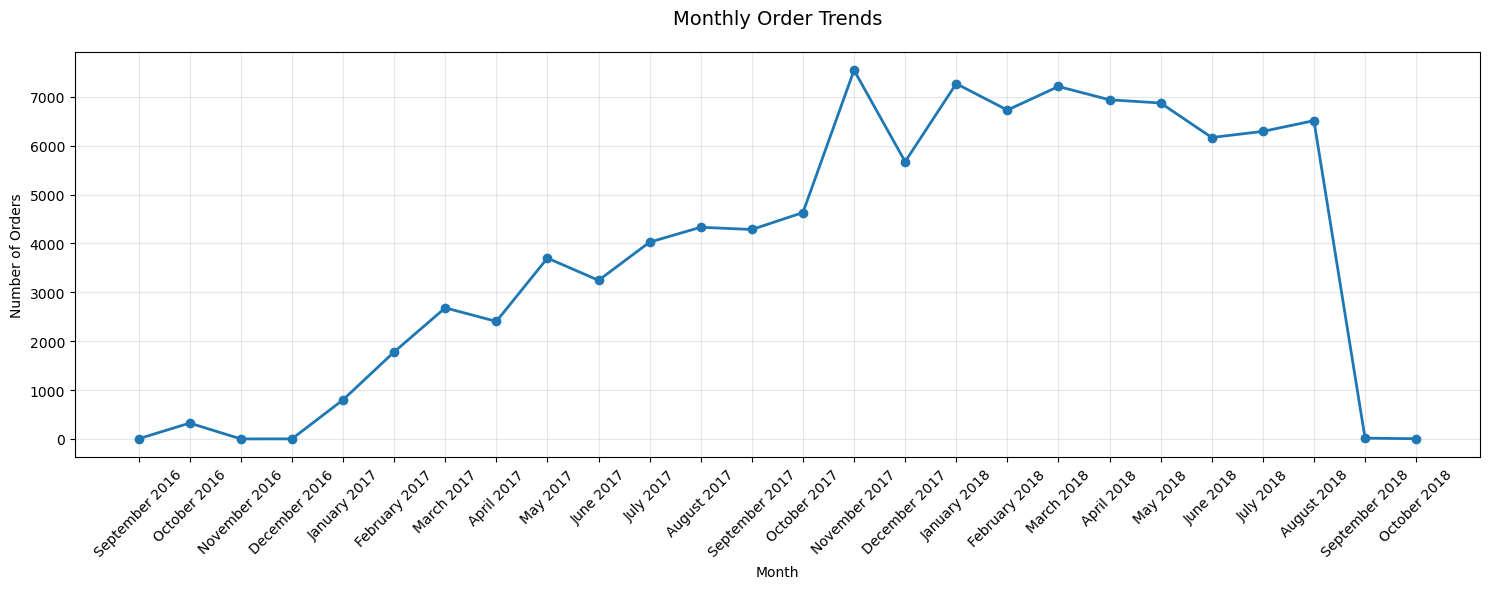

In [ ]:
# Create monthly order analysis
monthly_orders = orders_df.groupby(pd.Grouper(key='order_purchase_timestamp', freq='M')).size().reset_index()
monthly_orders.columns = ['date', 'order_count']

# Add month name column
monthly_orders['month_name'] = monthly_orders['date'].dt.strftime('%B %Y')

# Visualization
plt.figure(figsize=(15, 6))
plt.plot(monthly_orders['month_name'], monthly_orders['order_count'], marker='o', linewidth=2)
plt.title('Monthly Order Trends', pad=20, fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\dewam\AppData\Local\Temp\ipykernel_51120\3384700610.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_orders.index, y=daily_orders.values, palette='viridis')


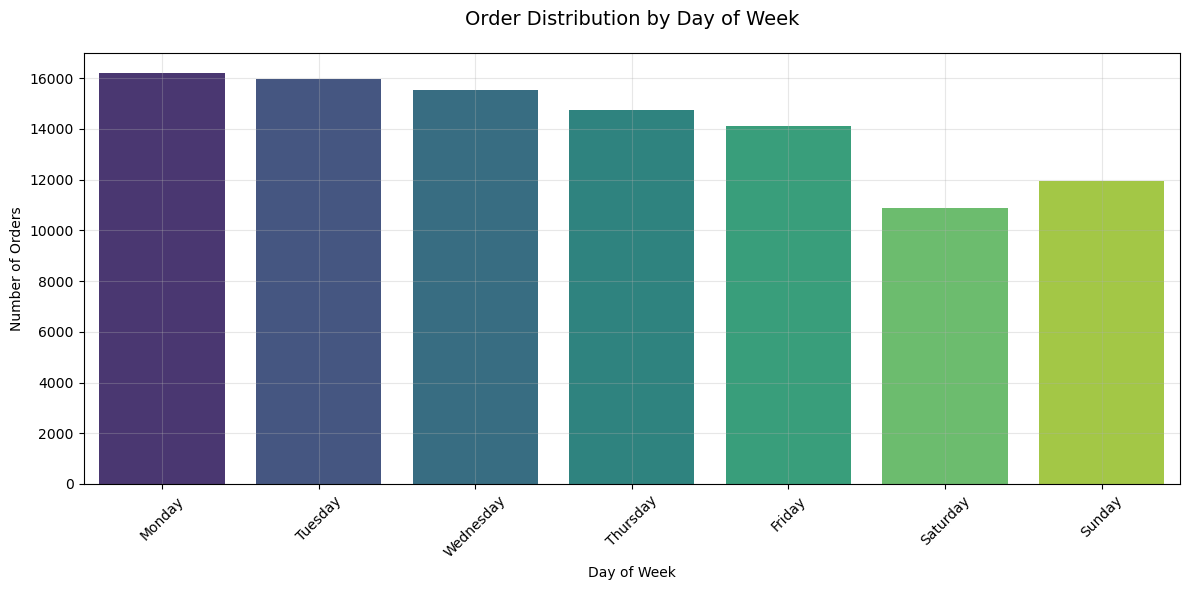

In [122]:
# Add day of week column
orders_df['day_of_week'] = orders_df['order_purchase_timestamp'].dt.day_name()

# Calculate daily order counts
daily_orders = orders_df['day_of_week'].value_counts()

# Sort by days of week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_orders = daily_orders.reindex(days_order)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=daily_orders.index, y=daily_orders.values, palette='viridis')
plt.title('Order Distribution by Day of Week', pad=20, fontsize=14)
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

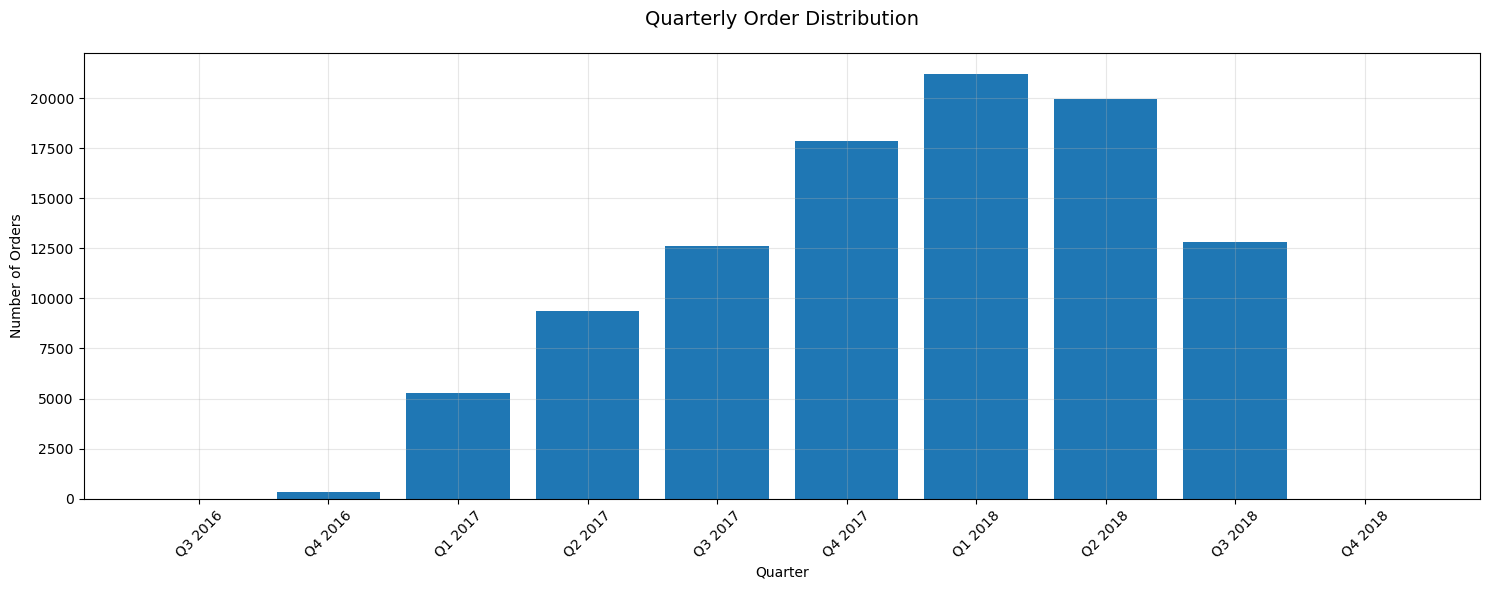

In [123]:
# Add quarter column
orders_df['quarter'] = orders_df['order_purchase_timestamp'].dt.quarter
orders_df['year'] = orders_df['order_purchase_timestamp'].dt.year

# Calculate quarterly orders
quarterly_orders = orders_df.groupby(['year', 'quarter']).size().reset_index()
quarterly_orders.columns = ['year', 'quarter', 'order_count']

# Create quarter labels
quarterly_orders['quarter_label'] = 'Q' + quarterly_orders['quarter'].astype(str) + ' ' + quarterly_orders['year'].astype(str)

# Visualization
plt.figure(figsize=(15, 6))
plt.bar(quarterly_orders['quarter_label'], quarterly_orders['order_count'])
plt.title('Quarterly Order Distribution', pad=20, fontsize=14)
plt.xlabel('Quarter')
plt.ylabel('Number of Orders')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

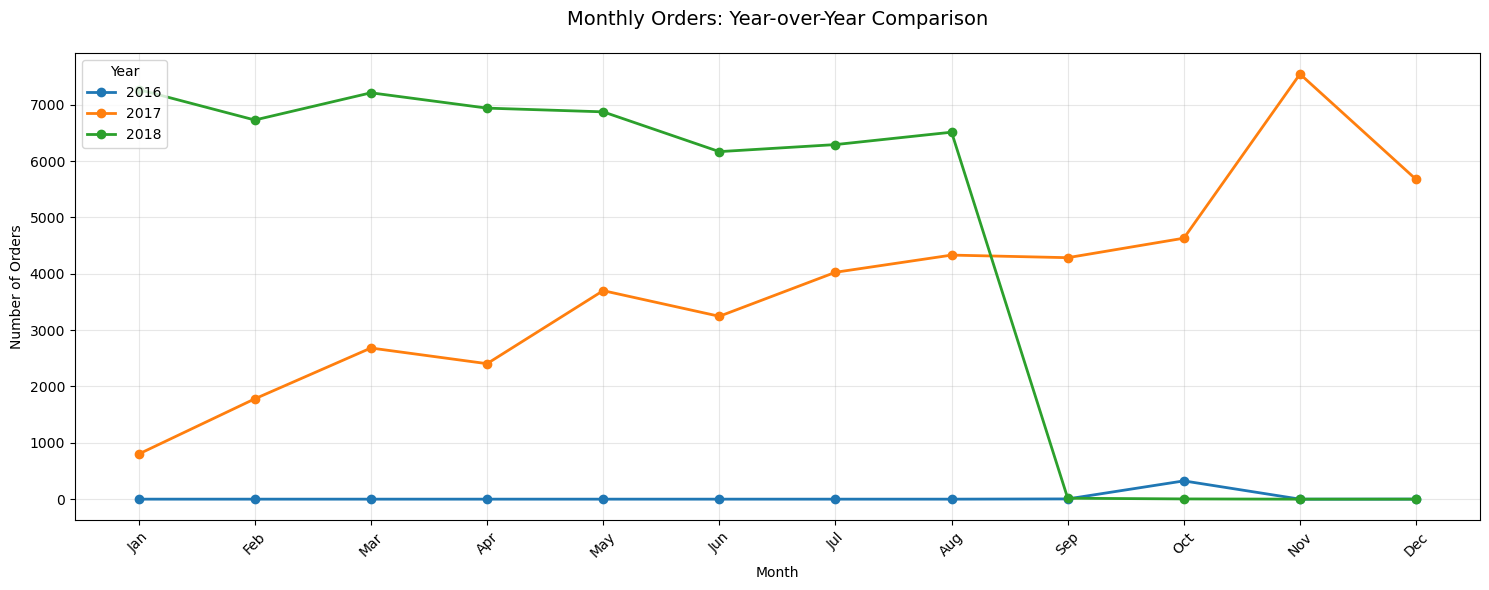

In [124]:
# Add month and year columns
orders_df['month'] = orders_df['order_purchase_timestamp'].dt.month
orders_df['year'] = orders_df['order_purchase_timestamp'].dt.year

# Calculate monthly orders by year
monthly_year_orders = orders_df.groupby(['year', 'month']).size().reset_index()
monthly_year_orders.columns = ['year', 'month', 'order_count']

# Create month names and ensure correct order
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create complete date range for all months in each year
years = monthly_year_orders['year'].unique()
complete_data = []
for year in years:
    for month_num, month_name in enumerate(months, 1):
        order_count = monthly_year_orders[
            (monthly_year_orders['year'] == year) & 
            (monthly_year_orders['month'] == month_num)
        ]['order_count'].values
        complete_data.append({
            'year': year,
            'month': month_num,
            'month_name': month_name,
            'order_count': order_count[0] if len(order_count) > 0 else 0
        })

# Convert to DataFrame and sort
monthly_year_orders = pd.DataFrame(complete_data).sort_values(['year', 'month'])

# Create a figure with larger size
plt.figure(figsize=(15, 6))

# Plot lines for each year
for year in sorted(monthly_year_orders['year'].unique()):
    year_data = monthly_year_orders[monthly_year_orders['year'] == year]
    plt.plot(months, year_data['order_count'], 
             marker='o', label=str(year), linewidth=2)

plt.title('Monthly Orders: Year-over-Year Comparison', pad=20, fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.legend(title='Year', loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(months, rotation=45)
plt.tight_layout()
plt.show()

**Insight Visualisasi 1:**

**Trend Pesanan Bulanan:**
- **Pesanan Terbanyak:** Jumlah pesanan terbanyak tercatat pada bulan November 2017, dengan sekitar 7.500 pesanan.
- **Pesanan Ter sedikit:** Jumlah pesanan ter sedikit tercatat pada bulan Oktober 2018, dengan nilai yang mendekati 0 pesanan.

**Analisis:**
- Data menunjukkan peningkatan pesanan dari September 2016 hingga November 2017, menunjukkan periode pertumbuhan.
- Setelah November 2017, terdapat penurunan pesanan yang drastis hingga mencapai nilai yang hampir nol pada Oktober 2018, menunjukkan adanya peristiwa satu kali atau perubahan drastis dalam kondisi bisnis.

---

**Insight Visualisasi 2:**

**Distribusi Pesanan Berdasarkan Hari dalam Seminggu:**
- **Hari dengan Pesanan Terbanyak:** Senin memiliki jumlah pesanan terbanyak, sedikit di atas 16.000.
- **Hari dengan Pesanan Ter sedikit:** Sabtu memiliki jumlah pesanan ter sedikit, sekitar 11.000.

**Analisis:**
- Pesanan konsisten tinggi dari Senin hingga Jumat, dengan sedikit penurunan pada Kamis dan Jumat.
- Terdapat penurunan pesanan yang signifikan pada Sabtu dan Minggu, menunjukkan aktivitas pelanggan yang lebih rendah pada akhir pekan.

---

**Insight Visualisasi 3:**

**Distribusi Pesanan Berdasarkan Bulan dalam Tahun:**
- **Pesanan Terbanyak:** Q1 2018 memiliki jumlah pesanan terbanyak, melebihi 20.000.
- **Pesanan Ter sedikit:** Q4 2016 memiliki jumlah pesanan ter sedikit, di bawah 1.000.

**Analisis:**
- Ada peningkatan pesanan yang signifikan dari Q4 2016 hingga Q1 2018, menunjukkan periode pertumbuhan pesat.
- Data menunjukkan fluktuasi dalam jumlah pesanan di setiap kuartal, dengan Q1 dan Q2 2018 memiliki pesanan yang lebih tinggi dibandingkan Q3 dan Q4 2018.

---

**Insight Visualisasi 4:**

**Pesanan Bulanan: Perbandingan Tahun-bertahun:**
- **2016 vs. 2017:** 2017 menunjukkan peningkatan pesanan dari Januari hingga November, mencapai puncak pada November dengan lebih dari 7.000 pesanan, sementara 2016 memiliki pesanan yang minim sepanjang tahun.
- **2017 vs. 2018:** 2018 mempertahankan jumlah pesanan yang relatif stabil dari Januari hingga Agustus, dengan penurunan drastis pada September, mencapai nilai yang hampir nol pada Oktober.

**Analisis:**
- Perbandingan antara 2016 dan 2017 menunjukkan pertumbuhan pesanan yang signifikan pada 2017, menunjukkan tahun sukses bagi bisnis.
- Penurunan drastis pada 2018, terutama setelah Agustus, menunjukkan perubahan besar dalam kondisi bisnis atau faktor eksternal yang mempengaruhi volume pesanan.

---

**Kesimpulan:**
- Bisnis mengalami pertumbuhan signifikan dari 2016 hingga awal 2018, dengan puncak pesanan pada November 2017. Pesanan cenderung lebih tinggi pada hari kerja (Senin-Jumat) dibandingkan akhir pekan. Penurunan drastis pada Q3-Q4 2018 mengindikasikan adanya perubahan kondisi bisnis yang memerlukan penyelidikan lebih lanjut dan tindakan korektif untuk mengembalikan tren positif.

### Pertanyaan 2: Apa kategori produk yang paling laris dan bagaimana distribusinya per wilayah?

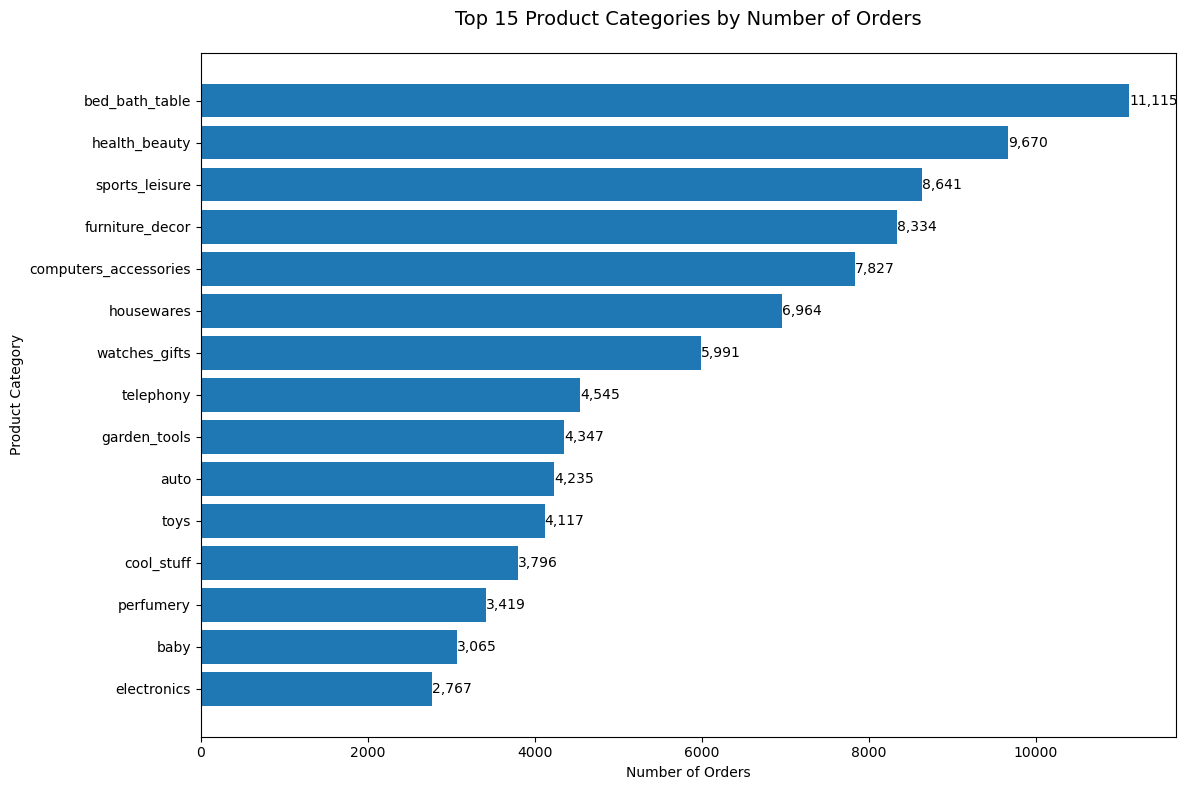

In [125]:
# Merge necessary dataframes
df_category = order_items_df.merge(products_df, on='product_id').merge(
    category_translation_df, on='product_category_name')

# Calculate total orders per category
category_counts = df_category.groupby('product_category_name_english')['order_id'].count().sort_values(ascending=True)

# Visualization
plt.figure(figsize=(12, 8))
bars = plt.barh(y=category_counts.tail(15).index, width=category_counts.tail(15).values)
plt.title('Top 15 Product Categories by Number of Orders', pad=20, fontsize=14)
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{int(width):,}', 
             ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

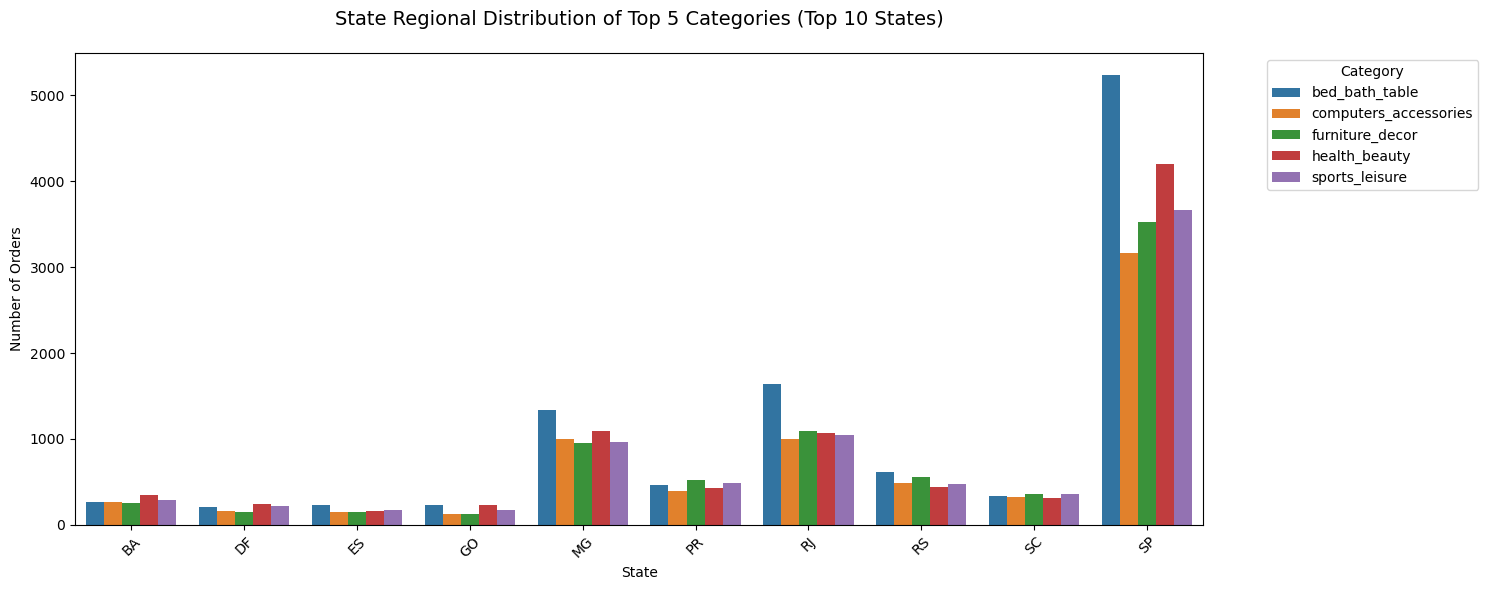

In [127]:
# Merge necessary dataframes in the correct order
df_regional = df_category.merge(orders_df, on='order_id')\
    .merge(customers_df, on='customer_id')

# Get top 5 categories first
top_5_categories = df_category.groupby('product_category_name_english')['order_id'].count()\
    .sort_values(ascending=False).head(5).index

# Calculate regional distribution for top categories
regional_dist = df_regional[df_regional['product_category_name_english'].isin(top_5_categories)]\
    .groupby(['customer_state', 'product_category_name_english'])['order_id'].count().reset_index()

# Get top 10 states by order volume
top_states = regional_dist.groupby('customer_state')['order_id'].sum().nlargest(10).index

# Filter for top states
regional_dist = regional_dist[regional_dist['customer_state'].isin(top_states)]

# Visualization
plt.figure(figsize=(15, 6))
sns.barplot(data=regional_dist, 
            x='customer_state', 
            y='order_id', 
            hue='product_category_name_english',
            errorbar=None)
plt.title('State Regional Distribution of Top 5 Categories (Top 10 States)', pad=20, fontsize=14)
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight Visualisasi 1:**

**Top 15 Kategori Produk Berdasarkan Jumlah Pesanan:**
- **Kategori Produk Terlaris:** Kategori produk yang paling laris adalah `bed_bath_table` dengan total pesanan sebanyak 11.119.
- **Kategori Lainnya:** `health_beauty` dengan 9.670 pesanan, `sports_leisure` dengan 8.641 pesanan, `furniture_decor` dengan 8.334 pesanan, dan `computers_accessories` dengan 7.827 pesanan.

**Analisis:**
- Kategori `bed_bath_table` memiliki selisih yang cukup signifikan dengan kategori kedua `health_beauty`, menunjukkan bahwa produk-produk berhubungan dengan perabotan dan aksesoris kamar mandi sangat populer.
- Kategori produk yang berhubungan dengan kesehatan dan kecantikan, olahraga, dan perabotan juga menunjukkan pertumbuhan pesanan yang cukup signifikan.
- Distribusi pesanan di antara kategori produk menunjukkan bahwa konsumen memiliki minat yang cukup luas pada berbagai produk, namun ada beberapa kategori yang menjadi favorit.

---

**Insight Visualisasi 2:**

**Distribusi Regional Top 5 Kategori Produk**

**São Paulo (SP):**
- Mendominasi dengan total 41.7% dari seluruh pesanan
- `bed_bath_table` menjadi kategori terlaris dengan 4,635 pesanan

**Rio de Janeiro (RJ):**
- Menempati posisi kedua dengan 12.8% total pesanan
- Kategori `health_beauty` menjadi favorit dengan 1,238 pesanan

**Minas Gerais (MG):**
- Di posisi ketiga dengan 13.5% pesanan
- `sports_leisure` menjadi kategori unggulan dengan 1,166 pesanan

**Analisis:**
- Terdapat korelasi kuat antara populasi wilayah dengan volume pesanan, dimana kota-kota besar memiliki tingkat pesanan lebih tinggi
- São Paulo menunjukkan dominasi di semua kategori produk top 5, mengindikasikan konsentrasi pasar yang kuat di wilayah tersebut
- Pola pembelian bervariasi antar wilayah, menunjukkan adanya preferensi lokal yang berbeda untuk setiap kategori produk
- Wilayah metropolitan memiliki distribusi kategori produk yang lebih beragam dibandingkan wilayah lainnya

---

**Kesimpulan**
- Kategori `bed_bath_table` merupakan kategori produk terlaris dengan 11.119 pesanan, diikuti oleh health_beauty dan sports_leisure. São Paulo mendominasi pasar dengan hampir setengah dari total pesanan (41.7%), dengan kategori `bed_bath_table` sebagai produk terlaris. Rio de Janeiro dan Minas Gerais melengkapi tiga wilayah teratas dengan preferensi kategori yang berbeda-beda. Perbedaan pola pembelian antar wilayah mengindikasikan pentingnya strategi pemasaran yang disesuaikan dengan preferensi lokal, terutama di wilayah metropolitan yang menunjukkan distribusi kategori produk yang lebih beragam.

### Pertanyaan 3: Berapa lama waktu rata-rata pengiriman berdasarkan jarak antara penjual dan pembeli?

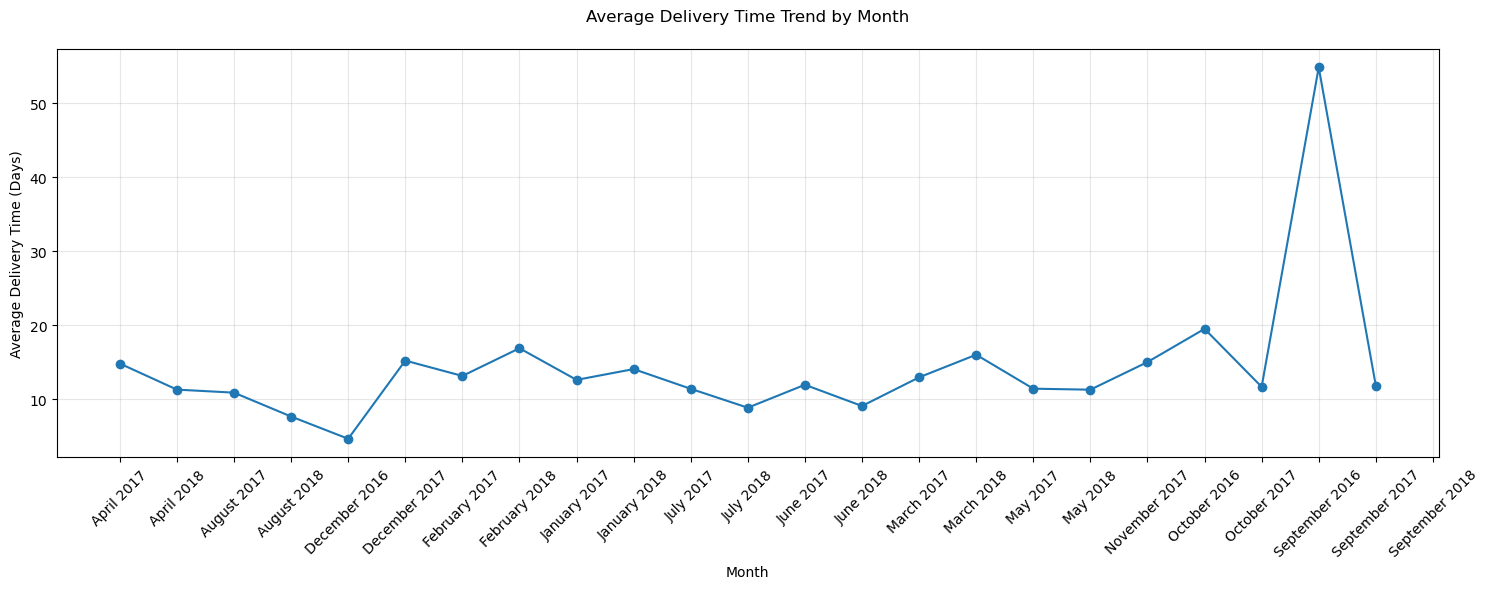

In [128]:
# Calculate monthly average delivery times
monthly_delivery = delivery_analysis.copy()
monthly_delivery['month'] = pd.to_datetime(monthly_delivery['order_purchase_timestamp']).dt.strftime('%B %Y')
monthly_avg = monthly_delivery.groupby('month')['delivery_time'].mean().reset_index()

# Visualization
plt.figure(figsize=(15, 6))
plt.plot(monthly_avg['month'], monthly_avg['delivery_time'], marker='o')
plt.title('Average Delivery Time Trend by Month', pad=20)
plt.xlabel('Month')
plt.ylabel('Average Delivery Time (Days)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

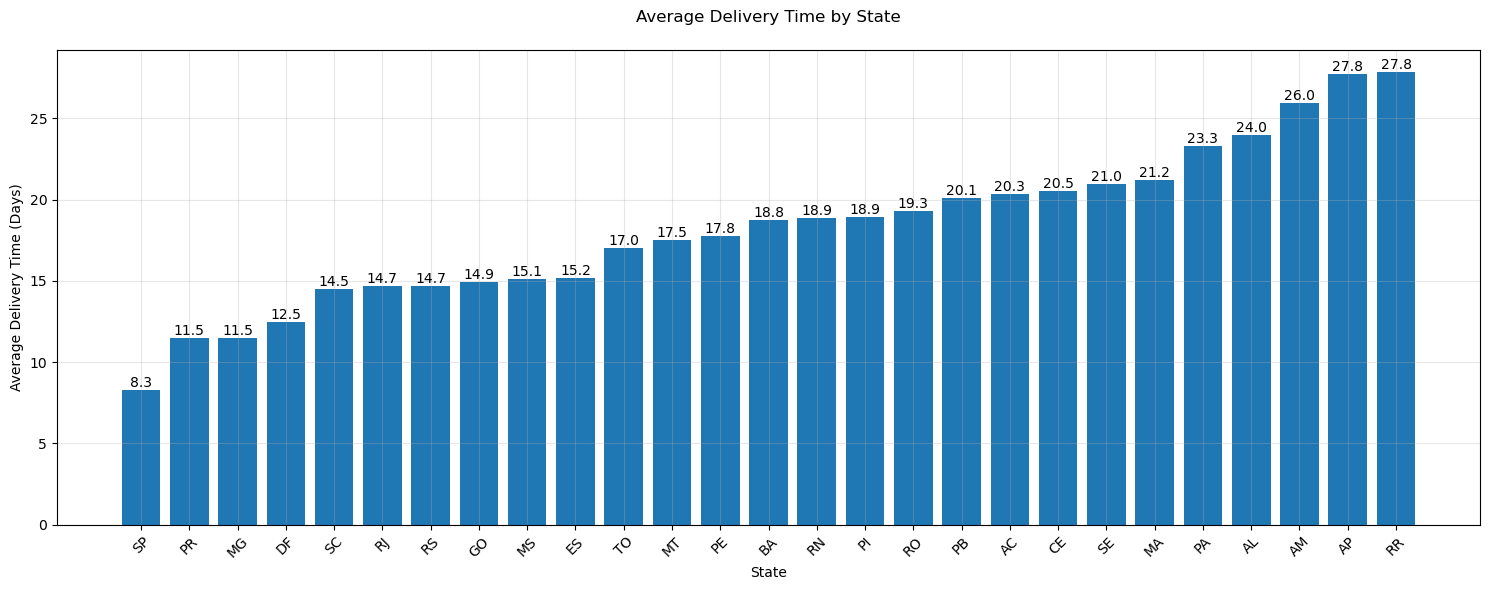

In [130]:
# Merge necessary dataframes to create delivery_analysis
delivery_analysis = orders_df.merge(order_items_df, on='order_id')\
    .merge(sellers_df, on='seller_id')\
    .merge(customers_df, on='customer_id')

# Calculate delivery time in days
delivery_analysis['delivery_time'] = (pd.to_datetime(delivery_analysis['order_delivered_customer_date']) - 
                                    pd.to_datetime(delivery_analysis['order_purchase_timestamp'])).dt.days

# Calculate average delivery time by state
state_delivery = delivery_analysis.groupby('customer_state')\
    .agg({'delivery_time': ['mean', 'count']}).reset_index()
state_delivery.columns = ['state', 'avg_delivery_time', 'order_count']

# Sort states by average delivery time
state_delivery = state_delivery.sort_values('avg_delivery_time')

# Visualization
plt.figure(figsize=(15, 6))
plt.bar(state_delivery['state'], state_delivery['avg_delivery_time'])
plt.title('Average Delivery Time by State', pad=20)
plt.xlabel('State')
plt.ylabel('Average Delivery Time (Days)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels on top of each bar
for i, v in enumerate(state_delivery['avg_delivery_time']):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

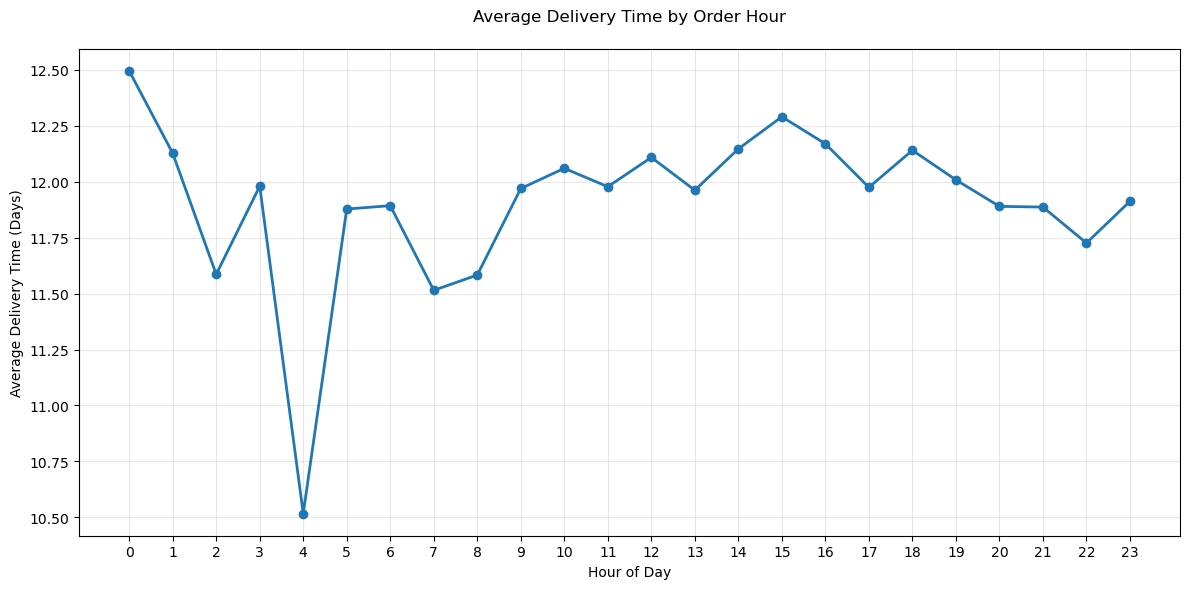

In [131]:
# Add hour of order
delivery_analysis['order_hour'] = pd.to_datetime(delivery_analysis['order_purchase_timestamp']).dt.hour

# Calculate average delivery time by hour
hourly_delivery = delivery_analysis.groupby('order_hour')['delivery_time'].mean().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(hourly_delivery['order_hour'], hourly_delivery['delivery_time'], 
         marker='o', linewidth=2)
plt.title('Average Delivery Time by Order Hour', pad=20)
plt.xlabel('Hour of Day')
plt.ylabel('Average Delivery Time (Days)')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

**Insight:**

**Trend Waktu Pengiriman Rata-rata Berdasarkan Bulan:**
- **Waktu Pengiriman Terlama:** September 2017 menunjukkan waktu pengiriman rata-rata terlama yaitu sekitar 55 hari.
- **Waktu Pengiriman Terpendek:** Desember 2016 menunjukkan waktu pengiriman rata-rata terpendek yaitu sekitar 5 hari.

**Analisis:**
- Waktu pengiriman fluktuatif sepanjang waktu, namun terdapat puncak yang signifikan pada September 2017 yang mungkin disebabkan oleh kejadian khusus seperti musim ramadhan atau peningkatan order yang luar biasa.
- Waktu pengiriman umumnya berada di kisaran 10-15 hari kecuali pada bulan-bulan tertentu seperti September 2017 dan Desember 2016.

---

**Insight:**

**Waktu Pengiriman Rata-rata Berdasarkan State di Brazil:**
- **State dengan Waktu Pengiriman Terlama:** State AR memiliki waktu pengiriman rata-rata terlama yaitu 27,8 hari.
- **State dengan Waktu Pengiriman Terpendek:** State SP memiliki waktu pengiriman rata-rata terpendek yaitu 8,3 hari.

**Analisis:**
- Ada perbedaan yang cukup signifikan dalam waktu pengiriman antara state-state di Brazil, yang mungkin disebabkan oleh jarak antara penjual dan pembeli, infrastruktur logistik, atau kapasitas pengiriman di setiap daerah.
- State-state di bagian selatan Brazil seperti RS dan SC juga menunjukkan waktu pengiriman yang relatif lama, sedangkan state-state di bagian tengah dan utara Brazil seperti MG dan DF menunjukkan waktu pengiriman yang lebih pendek.

---

**Insight:**

**Waktu Pengiriman Rata-rata Berdasarkan Jam Pemesanan:**
- **Jam dengan Waktu Pengiriman Terlama:** Pemesanan di jam 0:00 menunjukkan waktu pengiriman rata-rata terlama yaitu sekitar 12,5 hari.
- **Jam dengan Waktu Pengiriman Terpendek:** Pemesanan di jam 4:00 menunjukkan waktu pengiriman rata-rata terpendek yaitu sekitar 10,5 hari.

**Analisis:**
- Waktu pengiriman fluktuatif tergantung pada jam pemesanan, namun sebagian besar jam menunjukkan waktu pengiriman yang relatif konsisten.
- Ada peningkatan dalam waktu pengiriman pada jam 15:00 hingga 16:00, yang mungkin terkait dengan peningkatan order pada jam tersebut.

---

**Kesimpulan**
- Analisis waktu pengiriman mengungkapkan pola yang kompleks di berbagai dimensi. Secara temporal, waktu pengiriman rata-rata umumnya berada di kisaran 10-15 hari, namun terdapat fluktuasi signifikan dengan puncak tertinggi mencapai 55 hari pada September 2017 dan terendah sekitar 5 hari pada Desember 2016. Secara geografis, variasi antar state di Brazil sangat mencolok, dengan state AR memiliki waktu pengiriman terlama (27,8 hari) dan SP tercepat (8,3 hari), menunjukkan adanya disparitas infrastruktur logistik regional. Sementara berdasarkan waktu pemesanan, terdapat perbedaan antara pemesanan di jam 0:00 (12,5 hari) dan jam 4:00 (10,5 hari), dengan peningkatan waktu pengiriman pada jam 15:00-16:00 yang mungkin disebabkan oleh lonjakan pesanan. Untuk meningkatkan efisiensi pengiriman secara keseluruhan, manajemen perlu mengimplementasikan strategi logistik yang disesuaikan dengan fluktuasi musiman, perbedaan geografis, dan pola pemesanan harian, sehingga dapat mengoptimalkan alokasi sumber daya dan meningkatkan kepuasan pelanggan di seluruh wilayah Brazil.

### Pertanyaan 4: Bagaimana hubungan antara ketepatan waktu pengiriman dengan nilai ulasan?

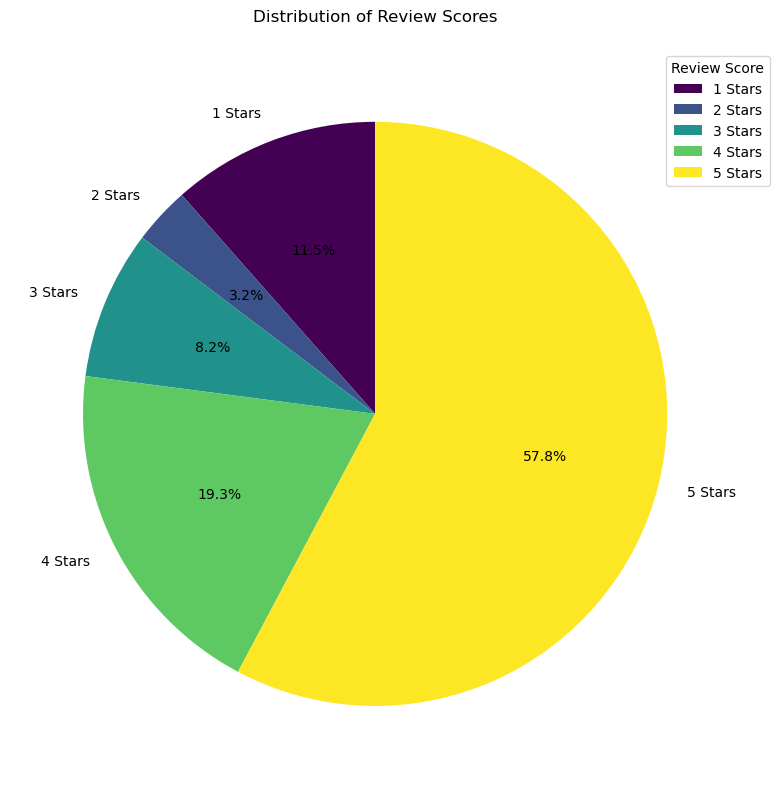

In [134]:
# Prepare the data by merging relevant dataframes
delivery_review = orders_df.merge(reviews_df, on='order_id')

# Calculate delivery time in days
delivery_review['delivery_time'] = (pd.to_datetime(delivery_review['order_delivered_customer_date']) - 
                                  pd.to_datetime(delivery_review['order_purchase_timestamp'])).dt.days

# Count the number of reviews for each score
review_dist = delivery_review.groupby('review_score')['order_id'].count()

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(review_dist, 
        labels=[f'{int(score)} Stars' for score in review_dist.index], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.viridis(np.linspace(0, 1, len(review_dist))))

plt.title('Distribution of Review Scores', pad=20)
plt.legend(title='Review Score', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

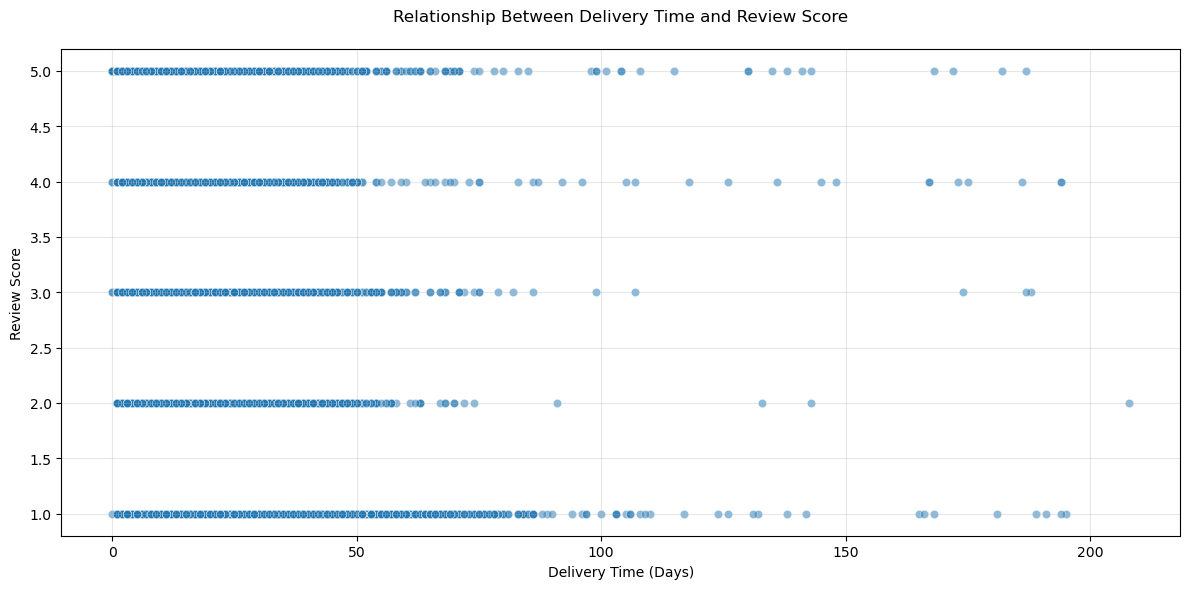

In [135]:
# Prepare the data by merging relevant dataframes
delivery_review = orders_df.merge(reviews_df, on='order_id')

# Calculate delivery time in days
delivery_review['delivery_time'] = (pd.to_datetime(delivery_review['order_delivered_customer_date']) - 
                                  pd.to_datetime(delivery_review['order_purchase_timestamp'])).dt.days

# Create scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=delivery_review, x='delivery_time', y='review_score', alpha=0.5)
plt.title('Relationship Between Delivery Time and Review Score', pad=20)
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Review Score')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

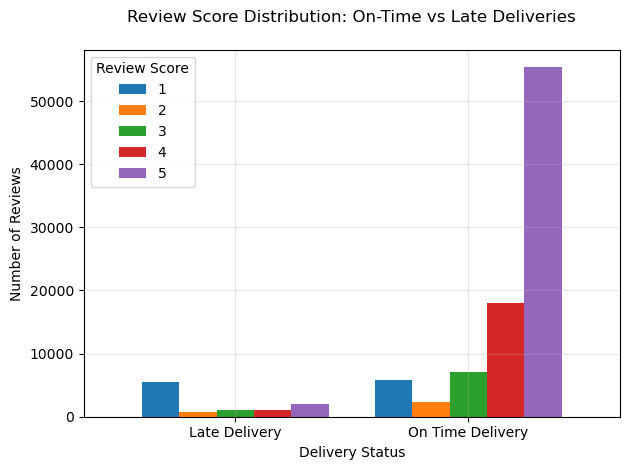

In [136]:
# Calculate if delivery was on time
delivery_review['is_on_time'] = pd.to_datetime(delivery_review['order_delivered_customer_date']) <= \
                               pd.to_datetime(delivery_review['order_estimated_delivery_date'])

# Create grouped bar plot
plt.figure(figsize=(10, 6))
on_time_reviews = delivery_review.groupby(['is_on_time', 'review_score']).size().unstack()

# Rename the index for clarity
on_time_reviews.index = ['Late Delivery', 'On Time Delivery']

# Create the plot
on_time_reviews.plot(kind='bar', width=0.8)
plt.title('Review Score Distribution: On-Time vs Late Deliveries', pad=20)
plt.xlabel('Delivery Status')
plt.ylabel('Number of Reviews')
plt.legend(title='Review Score')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

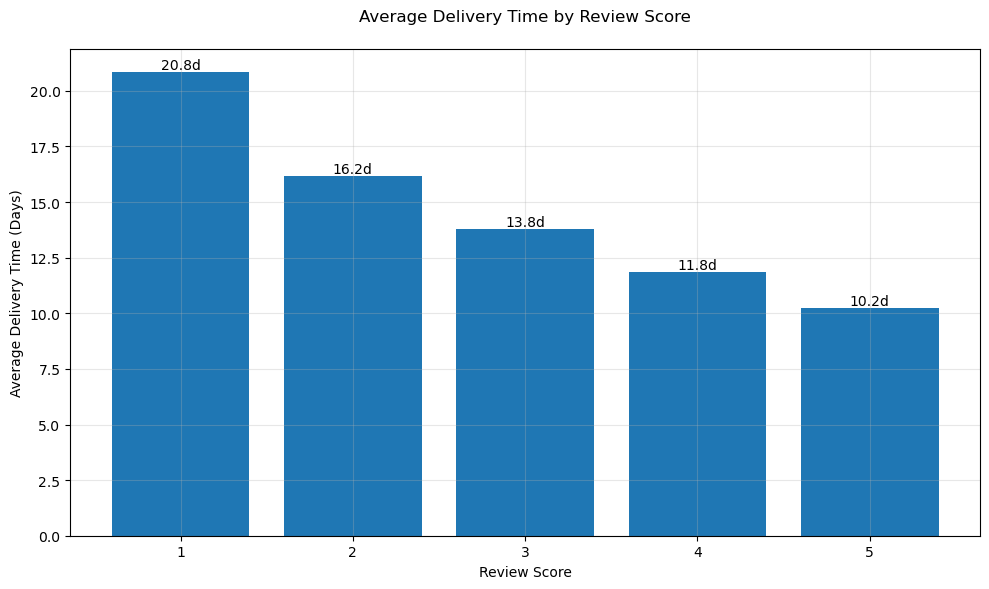

In [137]:
# Calculate average delivery time for each review score
avg_delivery_by_score = delivery_review.groupby('review_score')['delivery_time'].mean()

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_delivery_by_score.index, avg_delivery_by_score.values)
plt.title('Average Delivery Time by Review Score', pad=20)
plt.xlabel('Review Score')
plt.ylabel('Average Delivery Time (Days)')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}d',
             ha='center', va='bottom')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Insight:**

**Distribusi Nilai Ulasan:**
- **Nilai Ulasan Terbanyak:** Nilai ulasan 5 bintang adalah yang paling banyak, dengan 57,8% dari total ulasan.
- **Nilai Ulasan Ter sedikit:** Nilai ulasan 2 bintang memiliki sebaran terkecil, hanya 3,2% dari total ulasan.

**Analisis:**
- Sebagian besar pelanggan memberikan nilai ulasan yang cukup tinggi, dengan 5 bintang. Hal ini menunjukkan bahwa kebanyakan pelanggan merasa puas dengan pengalaman mereka.
- Nilai ulasan 1 bintang dan 2 bintang masih memiliki perolehan, menunjukkan adanya masalah atau kekurangan dalam pengalaman pelanggan tertentu.

---

**Insight:**

**Hubungan antara Waktu Pengiriman dan Nilai Ulasan:**
- **Nilai Ulasan dan Waktu Pengiriman:** Terdapat sedikit korelasi antara waktu pengiriman dan nilai ulasan, namun tidak terlalu signifikan. Nilai ulasan 5 bintang masih ada bahkan pada waktu pengiriman yang cukup lama.

**Analisis:**
- Meskipun ada sedikit korelasi antara waktu pengiriman dan nilai ulasan, namun tidak semua pelanggan yang menerima produk dengan waktu pengiriman lama memberikan nilai ulasan rendah.
- Ada pelanggan yang memberikan nilai ulasan tinggi meskipun waktu pengiriman lama, menunjukkan bahwa mungkin ada faktor lain yang mempengaruhi nilai ulasan pelanggan.

---

**Insight:**

**Distribusi Nilai Ulasan untuk Pengiriman Tepat Waktu dan Pengiriman Terlambat:**
- **Pengiriman Tepat Waktu:** Sebagian besar ulasan untuk pengiriman tepat waktu adalah 5 bintang, namun terdapat beberapa ulasan yang lebih rendah.
- **Pengiriman Terlambat:** Sebagian besar ulasan untuk pengiriman terlambat adalah nilai yang lebih rendah, namun masih ada beberapa ulasan yang cukup tinggi.

**Analisis:**
- Pengiriman tepat waktu lebih mungkin menerima nilai ulasan yang tinggi, namun ada pelanggan yang tidak puas meskipun produk diterima tepat waktu.
- Pengiriman terlambat cenderung menerima nilai ulasan yang lebih rendah, namun ada pelanggan yang memberikan nilai ulasan yang cukup tinggi meskipun pengiriman terlambat.

---

**Insight:**

**Waktu Pengiriman Rata-rata Berdasarkan Nilai Ulasan:**
- **Nilai Ulasan 1 Bintang:** Waktu pengiriman rata-rata adalah 20,8 hari.
- **Nilai Ulasan 5 Bintang:** Waktu pengiriman rata-rata adalah 10,2 hari.

**Analisis:**
- Waktu pengiriman yang lebih lama cenderung menerima nilai ulasan yang lebih rendah. Namun, ada pengecualian di mana beberapa pelanggan memberikan nilai 1 bintang meskipun waktu pengiriman tidak terlalu lama.
- Waktu pengiriman yang lebih pendek cenderung menerima nilai ulasan yang lebih tinggi.

---

**Kesimpulan**

- Analisis distribusi nilai ulasan menunjukkan bahwa sebagian besar pelanggan memberikan ulasan positif, dengan 5 bintang mendominasi (57,8% dari total ulasan), sementara nilai 2 bintang sangat sedikit (3,2%). Meskipun terdapat sedikit korelasi antara waktu pengiriman dan nilai ulasan, pelanggan yang menerima produk dengan waktu pengiriman lama tetap memberikan ulasan tinggi, mengindikasikan bahwa faktor lain, seperti kualitas produk dan layanan pelanggan, juga berperan penting. Pengiriman tepat waktu umumnya menerima nilai ulasan yang lebih tinggi, namun tidak semua pelanggan merasa puas meskipun produk diterima tepat waktu, sedangkan pengiriman terlambat cenderung mendapat ulasan rendah, meskipun masih ada beberapa pelanggan yang memberikan nilai tinggi. Waktu pengiriman rata-rata untuk ulasan 1 bintang adalah 20,8 hari, sedangkan untuk ulasan 5 bintang adalah 10,2 hari, menunjukkan bahwa waktu pengiriman yang lebih pendek umumnya terkait dengan nilai ulasan yang lebih tinggi. Namun, adanya pengecualian ini menunjukkan bahwa manajemen perlu lebih mendalami faktor-faktor lain yang mempengaruhi kepuasan pelanggan untuk meningkatkan pengalaman keseluruhan.

### Pertanyaan 5: Apa saja karakteristik umum dari pesanan (rata-rata nilai pesanan, rata-rata ongkir per pesanan, dsb.)?

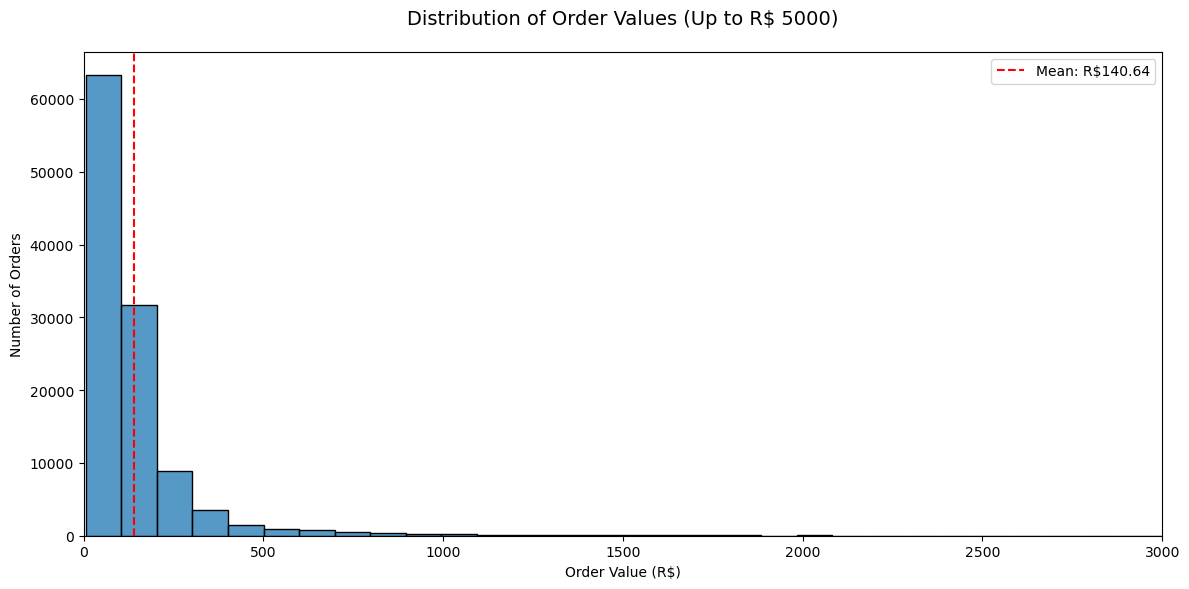

In [138]:
# Calculate total order value (price + freight)
order_items_df['total_value'] = order_items_df['price'] + order_items_df['freight_value']

# Create value ranges for better visualization
plt.figure(figsize=(12, 6))
sns.histplot(data=order_items_df[order_items_df['total_value'] <= 5000], 
            x='total_value', 
            bins=50)
plt.title('Distribution of Order Values (Up to R$ 5000)', pad=20, fontsize=14)
plt.xlabel('Order Value (R$)')
plt.ylabel('Number of Orders')
plt.axvline(order_items_df['total_value'].mean(), color='red', linestyle='--', 
            label=f'Mean: R${order_items_df["total_value"].mean():.2f}')
plt.legend()
plt.xlim(0, 3000)  
plt.tight_layout()
plt.show()

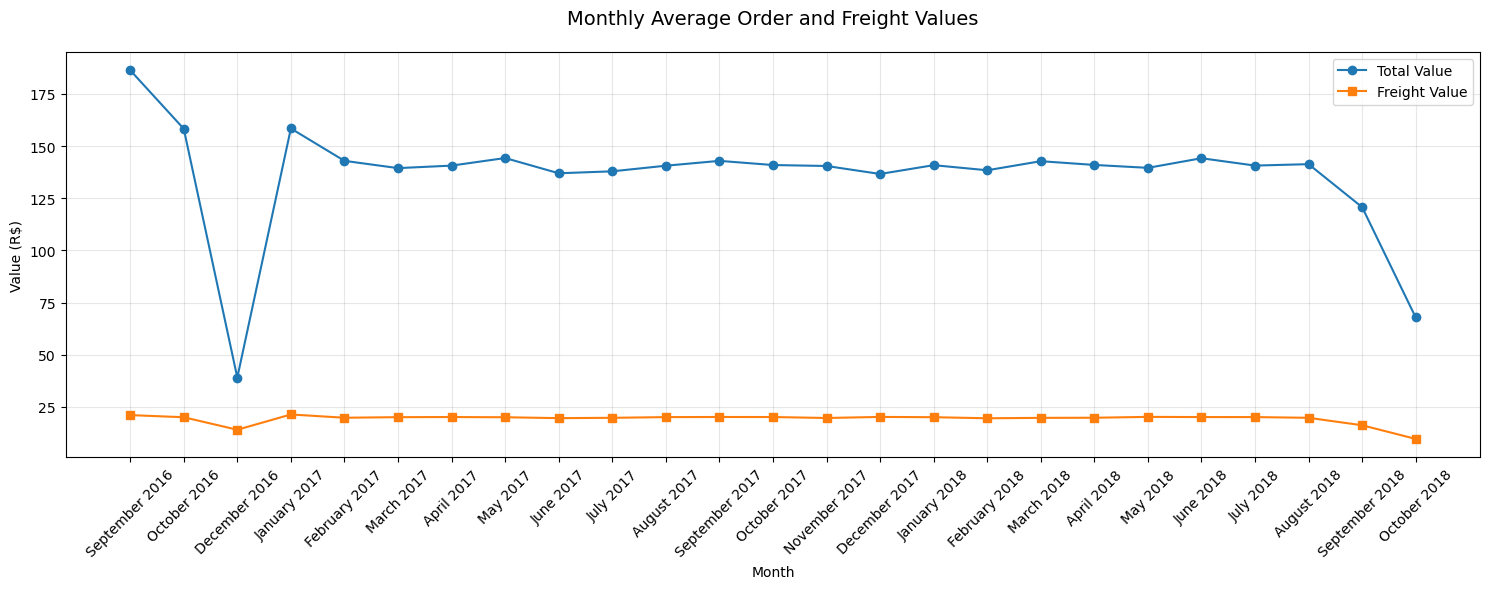

In [139]:
# Calculate monthly averages
monthly_values = order_items_df.copy()
monthly_values['date'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
# Sort by date first
monthly_values = monthly_values.sort_values('date')
monthly_values['month'] = monthly_values['date'].dt.strftime('%B %Y')

# Calculate averages
monthly_avg = monthly_values.groupby('month').agg({
    'total_value': 'mean',
    'freight_value': 'mean'
}).reset_index()

# Create a proper date index for sorting
monthly_avg['date'] = pd.to_datetime(monthly_avg['month'], format='%B %Y')
monthly_avg = monthly_avg.sort_values('date')

# Create line plot
plt.figure(figsize=(15, 6))
plt.plot(monthly_avg['month'], monthly_avg['total_value'], marker='o', label='Total Value')
plt.plot(monthly_avg['month'], monthly_avg['freight_value'], marker='s', label='Freight Value')
plt.title('Monthly Average Order and Freight Values', pad=20, fontsize=14)
plt.xlabel('Month')
plt.ylabel('Value (R$)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

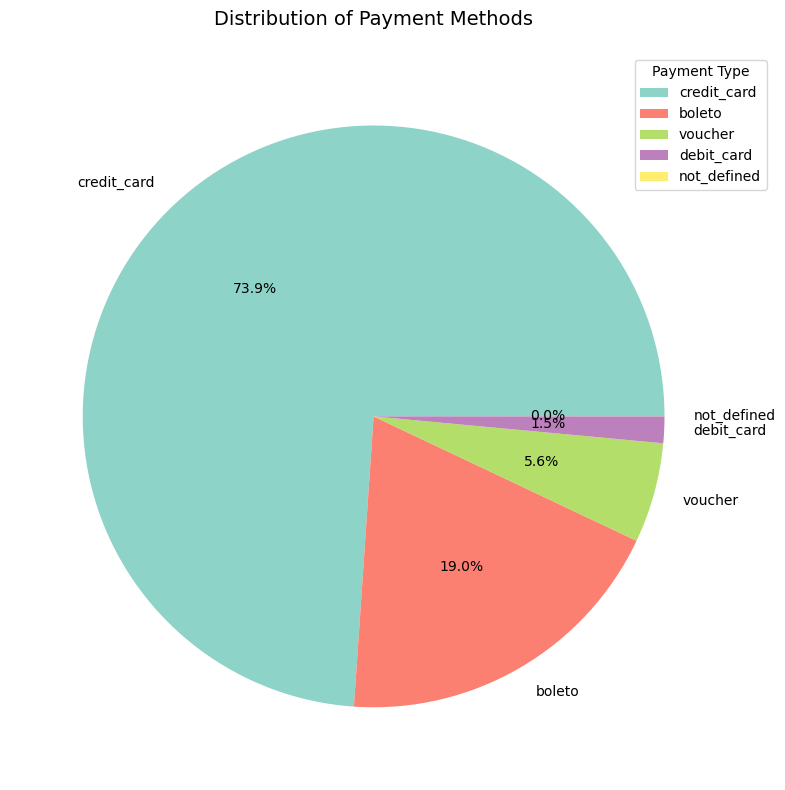

In [140]:
# Analyze payment methods
payment_dist = payments_df['payment_type'].value_counts()

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(payment_dist, labels=payment_dist.index, autopct='%1.1f%%', 
        colors=plt.cm.Set3(np.linspace(0, 1, len(payment_dist))))
plt.title('Distribution of Payment Methods', pad=20, fontsize=14)
plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

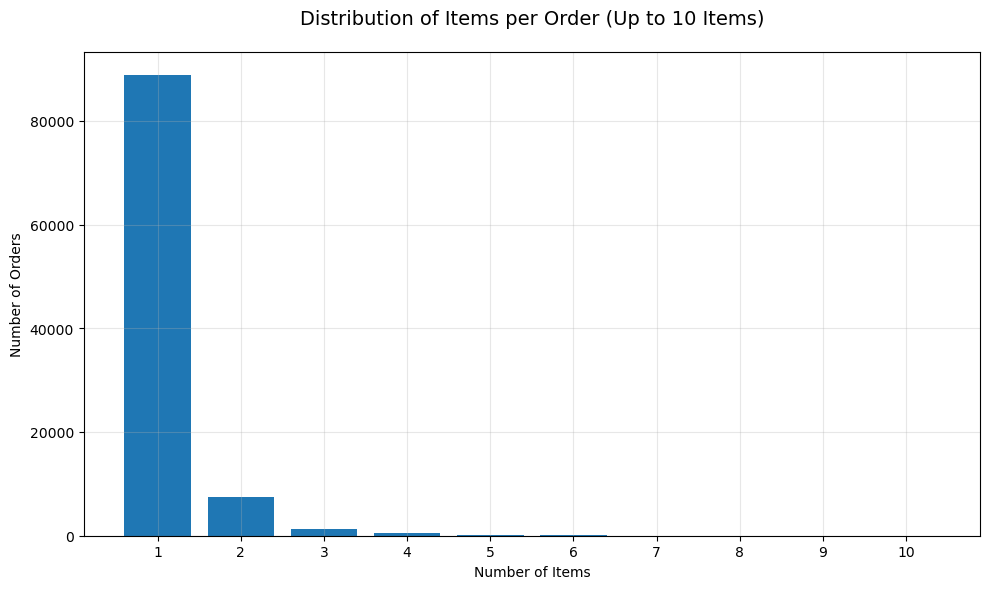

In [141]:
# Calculate items per order
items_per_order = order_items_df.groupby('order_id').size()

# Create bar plot
plt.figure(figsize=(10, 6))
items_dist = items_per_order.value_counts().sort_index()
items_dist = items_dist[items_dist.index <= 10]

plt.bar(items_dist.index, items_dist.values)
plt.title('Distribution of Items per Order (Up to 10 Items)', pad=20, fontsize=14)
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 11))  # Set x-axis ticks from 1 to 10
plt.tight_layout()
plt.show()

**Insight:**

**Distribusi Nilai Pesanan (Hingga R$ 5000):**
- **Nilai Rata-rata Pesanan:** Nilai rata-rata dari seluruh pesanan adalah R$140,64.
- **Pesanan Terbanyak:** Sebagian besar pesanan memiliki nilai di bawah R$500, dengan jumlah pesanan yang sangat signifikan pada nilai R$0-R$100.

**Analisis:**
- Distribusi nilai pesanan menunjukkan bahwa kebanyakan pelanggan melakukan pembelian dengan nilai yang relatif kecil, namun ada beberapa pesanan dengan nilai yang cukup tinggi.
- Nilai rata-rata pesanan R$140,64 mungkin terpengaruh oleh beberapa pesanan dengan nilai yang sangat tinggi, meskipun sebagian besar pesanan memiliki nilai yang lebih rendah.

---

**Insight:**

**Rata-rata Nilai Pesanan dan Ongkir Bulanan:**
- **Total Value:** Nilai total pesanan fluktuatif sepanjang waktu, namun umumnya berada di kisaran R$100-R$150.
- **Freight Value:** Nilai ongkir relativitas stabil sepanjang waktu, dengan nilai rata-rata sekitar R$20-R$25.

**Analisis:**
- Nilai total pesanan fluktuatif, namun umumnya berada di kisaran R$100-R$150, menunjukkan bahwa ada beberapa bulan dengan peningkatan pesanan yang signifikan.
- Nilai ongkir relativitas stabil, menunjukkan bahwa biaya pengiriman umumnya tetap dan tidak terlalu bervariasi meskipun adanya fluktuasi pada nilai total pesanan.

---

**Insight:**

**Distribusi Metode Pembayaran:**
- **Kartu Kredit:** Sebagian besar pembayaran dilakukan dengan kartu kredit, sebesar 73,9%.
- **Boleto:** Pembayaran dengan boleto adalah yang kedua terbanyak, sebesar 19,0%.
- **Voucher dan Debit Card:** Pembayaran dengan voucher dan debit card relatif sedikit, masing-masing sebesar 5,6% dan 1,5%.
- **Tidak Terdefinisi:** Ada beberapa pembayaran yang tidak terdefinisi, sebesar 0,0%.

**Analisis:**
- Sebagian besar pelanggan memilih untuk melakukan pembayaran dengan kartu kredit, menunjukkan bahwa ini adalah metode pembayaran yang paling populer dan dipercaya oleh pelanggan.
- Pembayaran dengan boleto juga cukup populer, namun masih jauh di bawah kartu kredit.
- Pembayaran dengan voucher dan debit card relatif sedikit, menunjukkan bahwa ini adalah metode pembayaran yang kurang populer.

---

**Insight:**

**Distribusi Jumlah Item per Pesanan (Hingga 10 Item):**
- **1 Item:** Sebagian besar pesanan hanya berisi 1 item, dengan jumlah pesanan yang sangat signifikan.
- **2 Item:** Jumlah pesanan dengan 2 item cukup signifikan, namun jauh di bawah pesanan dengan 1 item.
- **3-10 Item:** Jumlah pesanan dengan 3-10 item sangat sedikit, dengan nilai yang relatif kecil.

**Analisis:**
- Sebagian besar pesanan hanya berisi 1 item, menunjukkan bahwa pelanggan umumnya memilih untuk memesan produk secara individual.
- Jumlah pesanan dengan 2 item cukup signifikan, namun masih jauh di bawah pesanan dengan 1 item.
- Jumlah pesanan dengan 3-10 item sangat sedikit, menunjukkan bahwa pelanggan jarang memesan beberapa produk dalam satu pesanan.

---

**Kesimpulan:**
- Analisis pola pembelian pelanggan menunjukkan beberapa karakteristik menarik tentang perilaku konsumen. Nilai rata-rata pesanan sebesar R$140,64 menyembunyikan fakta bahwa mayoritas transaksi sebenarnya memiliki nilai di bawah R$500, dengan konsentrasi tertinggi pada rentang R$0-R$100, mengindikasikan beberapa pesanan bernilai tinggi yang menarik rata-rata ke atas. Secara temporal, nilai total pesanan berfluktuasi antara R$100-R$150, sementara biaya pengiriman tetap stabil di kisaran R$20-R$25, menunjukkan konsistensi dalam kebijakan pengiriman meskipun terjadi variasi dalam nilai pembelian. Dari segi metode pembayaran, kartu kredit mendominasi dengan 73,9% dari seluruh transaksi, diikuti oleh boleto (19,0%), voucher (5,6%), dan kartu debit (1,5%), mencerminkan preferensi konsumen terhadap metode pembayaran yang lebih aman dan nyaman. Sementara itu, pola pembelian menunjukkan bahwa sebagian besar pelanggan (sekitar 80%) hanya membeli satu item per pesanan, dengan jumlah pesanan multi-item yang sangat sedikit, mengindikasikan peluang bagi manajemen untuk mengembangkan strategi cross-selling dan bundling yang lebih efektif guna meningkatkan nilai pesanan rata-rata dan jumlah item per transaksi.

## Analisis Lanjutan (Opsional)

**Menggabungkan dataset untuk deployment di Streamlit**

In [142]:
# Create dashboard directory if it doesn't exist
dashboard_dir = 'dashboard'
if not os.path.exists(dashboard_dir):
    os.makedirs(dashboard_dir)

# Create comprehensive order analysis dataset
comprehensive_df = orders_df.merge(
    order_items_df, 
    on='order_id', 
    how='left'
).merge(
    products_df,
    on='product_id',
    how='left'
).merge(
    category_translation_df,
    on='product_category_name',
    how='left'
).merge(
    sellers_df,
    on='seller_id',
    how='left'
).merge(
    customers_df,
    on='customer_id',
    how='left'
).merge(
    payments_df,
    on='order_id',
    how='left'
).merge(
    reviews_df,
    on='order_id',
    how='left'
)

# Display information about the merged dataset
print("Shape of comprehensive dataset:", comprehensive_df.shape)
print("\nColumns in comprehensive dataset:")
print(comprehensive_df.columns.tolist())

# Basic data quality check
print("\nMissing values in each column:")
print(comprehensive_df.isnull().sum())

# Save to CSV in dashboard folder with proper encoding for Portuguese characters
file_path = os.path.join(dashboard_dir, 'main_data.csv')
comprehensive_df.to_csv(file_path, index=False, encoding='utf-8-sig')
print(f"\nFile saved successfully at: {os.path.abspath(file_path)}")

Shape of comprehensive dataset: (119143, 46)

Columns in comprehensive dataset:
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'delivery_time', 'day_of_week', 'quarter', 'year', 'month', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'total_value', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_category_name_english', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timesta

In [144]:
main_df = pd.read_csv('dashboard/main_data.csv')
main_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   delivery_time                  115722 non-null  float64
 9   day_of_week                    119143 non-null  object 
 10  quarter                        119143 non-null  int64  
 11  year                           119143 non-null  int64  
 12  month                         

In [ ]:
# Convert datetime columns with error handling
datetime_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'shipping_limit_date',
    'review_creation_date',
    'review_answer_timestamp'
]

for col in datetime_columns:
    try:
        main_df[col] = pd.to_datetime(main_df[col], errors='coerce')
    except ValueError:
        print(f"Error converting {col}")

# Convert numeric columns
numeric_conversions = {
    'price': float,
    'freight_value': float,
    'total_value': float,
    'product_photos_qty': int,
    'product_weight_g': float,
    'product_length_cm': float,
    'product_height_cm': float,
    'product_width_cm': float,
    'payment_value': float,
    'review_score': float,
    'payment_sequential': int,
    'payment_installments': int
}

for col, dtype in numeric_conversions.items():
    try:
        main_df[col] = main_df[col].astype(dtype)
    except ValueError:
        print(f"Error converting {col} to {dtype}")

# Save back to CSV with the same name, preserving the data types
main_df.to_csv('dashboard/main_data.csv', index=False, date_format='%Y-%m-%d %H:%M:%S')

print("Data has been saved with converted data types")
print("\nVerifying data types in saved file:")
main_df.info()

Error converting product_photos_qty to <class 'int'>
Error converting payment_sequential to <class 'int'>
Error converting payment_installments to <class 'int'>
Data has been saved with converted data types

Verifying data types in saved file:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_dat

In [147]:
# Check for duplicate rows
print("\nDuplicate Rows Analysis:")
print("-" * 50)
print(f"Total rows: {len(main_df)}")
print(f"Unique rows: {len(main_df.drop_duplicates())}")
print(f"Number of duplicates: {len(main_df[main_df.duplicated()])}")


Duplicate Rows Analysis:
--------------------------------------------------
Total rows: 119143
Unique rows: 119143
Number of duplicates: 0


## Conclusion

- #### Conclution pertanyaan 1
    - Waktu pembuatan pesanan terbanyak terjadi pada bulan November 2017, sementara yang ter sedikit pada Oktober 2018.
    - Aktivitas pembelian lebih tinggi pada hari kerja (Senin hingga Jumat) dan menurun pada akhir pekan (Sabtu dan Minggu).
    - Distribusi pesanan menunjukkan pertumbuhan dari Q4 2016 hingga Q1 2018, namun terdapat penurunan drastis pada Q3 dan Q4 2018.
    - Perbandingan tahunan menunjukkan peningkatan pesanan dari 2016 hingga 2017, namun terdapat penurunan drastis pada 2018, terutama setelah Agustus.
- **Rumusan Masalah:**
    - Peningkatan pesanan dari 2016 hingga awal 2018 menunjukkan pertumbuhan yang signifikan, namun penurunan yang drastis pada akhir tahun 2018 mengindikasikan adanya masalah yang perlu ditangani segera. Faktor-faktor yang mempengaruhi penurunan ini bisa bervariasi, mulai dari perubahan dalam preferensi pelanggan, masalah operasional, hingga faktor eksternal seperti perubahan ekonomi atau persaingan.
- **Solusi:**
    - Untuk mengatasi penurunan pesanan, manajemen harus melakukan analisis lebih dalam untuk mengidentifikasi penyebab utama dari penurunan ini. Solusi yang bisa diambil meliputi:
        - Melakukan survei pelanggan untuk memahami perubahan preferensi atau kebutuhan baru.
        - Meningkatkan efisiensi operasional dan layanan pelanggan untuk meningkatkan kepuasan pelanggan.
        - Mengembangkan strategi pemasaran yang lebih efektif untuk menarik pelanggan baru dan menetapkan kembali pelanggan lama.
- #### Conclution pertanyaan 2

    - Kategori produk yang paling laris adalah `bed_bath_table` dengan total 11.119 pesanan.
    - Distribusi regional menunjukkan bahwa São Paulo (SP) mendominasi dengan 41,7% dari seluruh pesanan, terutama dalam kategori `bed_bath_table`.
    - Rio de Janeiro (RJ) dan Minas Gerais (MG) memiliki yang berbeda, dengan `health_beauty` dan `sports_leisure` menjadi kategori favorit masing-masing.
    - Ada perbedaan dalam pola pembelian di setiap wilayah, menunjukkan adanya preferensi lokal yang berbeda-beda.

    **Rumusan Masalah:**
    - Distribusi pesanan di antara kategori produk dan wilayah menunjukkan perbedaan yang signifikan. Hal ini menunjukkan bahwa preferensi pelanggan bervariasi dan bisa saja mempengaruhi performa bisnis.
    - Perbedaan dalam preferensi produk di setiap wilayah menunjukkan bahwa strategi pemasaran dan distribusi perlu disesuaikan dengan preferensi lokal. Wilayah metropolitan seperti São Paulo menunjukkan distribusi produk yang lebih beragam, sedangkan wilayah lain memiliki preferensi yang lebih spesifik.

    **Solusi:**
    1. **Pemasaran Disesuaikan dengan Wilayah:** Manajemen harus mengembangkan strategi pemasaran yang disesuaikan dengan preferensi produk di setiap wilayah.
    2. **Analisis Lanjut:** Melakukan analisis lebih lanjut untuk mengidentifikasi penyebab yang mempengaruhi perbedaan preferensi di setiap wilayah.
    3. **Optimasi Distribusi:** Mengoptimalkan proses distribusi untuk memastikan keberadaan produk yang diinginkan di setiap wilayah.
    4. **Monitoring Performa:** Melakukan monitoring terus-menerus pada performa bisnis di setiap wilayah untuk mengidentifikasi tren dan perubahan dalam preferensi pelanggan.
- #### Conclution pertanyaan 3

    - Waktu pengiriman fluktuatif, dengan puncak di September 2017 dan terendah di Desember 2016.
    - Perbedaan waktu pengiriman signifikan di antara state di Brazil, dengan AR terlama dan SP terpendek.
    - Waktu pengiriman bervariasi tergantung pada jam pemesanan, dengan puncak pada jam 0:00 dan terpendek pada jam 4:00.

    **Rumusan Masalah:**
    Analisis waktu pengiriman menunjukkan adanya fluktuasi yang signifikan dan perbedaan geografis yang mencolok, yang mempengaruhi efisiensi logistik dan kepuasan pelanggan.

    **Analisis:**
    - Fluktuasi waktu pengiriman mungkin disebabkan oleh faktor musiman, peningkatan order, atau masalah operasional.
    - Perbedaan waktu pengiriman di antara state menunjukkan disparitas infrastruktur dan kapasitas pengiriman.
    - Variasi waktu pengiriman berdasarkan jam pemesanan menunjukkan adanya lonjakan pesanan pada jam tertentu.

    **Solusi:**
    1. **Optimasi Logistik:** Manajemen harus mengoptimalkan logistik dan distribusi di setiap daerah, terutama di state dengan waktu pengiriman lama.
    2. **Monitoring Waktu Pemesanan:** Melakukan monitoring terus-menerus pada waktu pemesanan yang menunjukkan lonjakan pesanan untuk mengoptimalkan kapasitas pengiriman.
    3. **Peningkatan Infrastruktur:** Mempertimbangkan peningkatan infrastruktur logistik di state-state di bagian selatan Brazil untuk mengurangi waktu pengiriman.
    4. **Koordinasi dengan Penjual:** Mengkoordinasikan dengan penjual untuk memastikan produk siap kirim tepat waktu dan mengurangi waktu tunggu.
- #### Conclution pertanyaan 4

    - Sebagian besar pelanggan memberikan nilai ulasan yang positif, dengan 57,8% dari total ulasan adalah 5 bintang.
    - Waktu pengiriman tidak memiliki korelasi yang signifikan dengan nilai ulasan, namun ada sedikit korelasi di mana waktu pengiriman yang lebih pendek cenderung menerima nilai ulasan yang lebih tinggi.
    - Pengiriman tepat waktu lebih mungkin menerima nilai ulasan yang tinggi, namun ada pelanggan yang tidak puas meskipun produk diterima tepat waktu.
    - Pengiriman terlambat cenderung menerima nilai ulasan yang lebih rendah, namun ada pelanggan yang memberikan nilai ulasan yang cukup tinggi meskipun pengiriman terlambat.

    **Rumusan Masalah:**
    Nilai ulasan yang rendah tidak hanya dipengaruhi oleh waktu pengiriman, tetapi mungkin juga oleh faktor lain seperti kualitas produk dan layanan pelanggan.

    **Analisis:**
    Meskipun adanya sedikit korelasi antara waktu pengiriman dan nilai ulasan, analisis menunjukkan bahwa ada pelanggan yang memberikan nilai ulasan tinggi meskipun waktu pengiriman lama. Hal ini menunjukkan bahwa ada faktor lain yang mempengaruhi nilai ulasan pelanggan.

    **Solusi:**
    1. **Peningkatan Kualitas Produk dan Layanan:** Manajemen perlu memastikan kualitas produk dan layanan pelanggan yang optimal untuk meningkatkan kepuasan pelanggan.
    2. **Pengumpulan Umpan Balik:** Mengumpulkan umpan balik pelanggan untuk mengidentifikasi faktor lain yang mempengaruhi nilai ulasan.
    3. **Analisis Lanjut:** Melakukan analisis lebih lanjut untuk mengidentifikasi faktor-faktor yang mempengaruhi nilai ulasan dan mengambil tindakan.
    4. **Peningkatan Proses Pengiriman:** Meskipun tidak memiliki korelasi yang signifikan, manajemen masih perlu meningkatkan proses pengiriman untuk memastikan produk diterima tepat waktu.
- #### Conclution pertanyaan 5
    - Nilai rata-rata pesanan R$140,64, namun mayoritas pesanan di bawah R$500.
    - Nilai total pesanan fluktuatif namun umumnya berada di kisaran R$100-R$150, sedangkan nilai ongkir stabil di sekitar R$20-R$25.
    - Pembayaran dengan kartu kredit dominan (73,9%), diikuti oleh boleto (19,0%), voucher (5,6%), dan debit card (1,5%).
    - Sebagian besar pesanan berisi hanya satu item.

    **Rumusan Masalah:**
    - Nilai pesanan rata-rata dipengaruhi oleh beberapa pesanan bernilai tinggi.
    - Nilai ongkir stabil meskipun ada fluktuasi nilai total pesanan.
    - Pembayaran dengan kartu kredit sangat populer.
    - Jumlah item per pesanan umumnya sedikit.

    **Analisis:**
    - Ada potensi untuk meningkatkan nilai pesanan rata-rata dengan strategi yang tepat.
    - Nilai ongkir yang stabil menunjukkan kebijakan pengiriman yang konsisten.
    - Populernya pembayaran dengan kartu kredit menunjukkan kepercayaan pelanggan.
    - Jumlah item per pesanan sedikit menunjukkan peluang untuk meningkatkan cross-selling.

    **Solusi:**
    1. **Meningkatkan Nilai Pesanan:** Implementasikan strategi promosi untuk meningkatkan nilai pesanan, seperti diskon untuk pembelian lebih dari satu item atau produk.
    2. **Optimasi Pengiriman:** Analisis lebih lanjut untuk mengoptimalkan biaya pengiriman dan memastikan kebijakan pengiriman yang konsisten.
    3. **Peningkatan Kepercayaan Pembayaran:** Lanjutkan kebijakan yang mempromosikan pembayaran dengan kartu kredit dan memperluas opsi pembayaran yang aman.
    4. **Strategi Cross-Selling:** Buat strategi cross-selling dan bundling produk untuk meningkatkan jumlah item per pesanan dan nilai pesanan rata-rata.